# <span style='color:Purple'> Projet 6 : Détectez des faux billets</span>

### Importez les données
On charge tout d'abord les librairies nécessaires pour réaliser ce TP :

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
import statistics
from scipy.stats import shapiro
import scipy
import seaborn as sns

In [2]:
import os
os.listdir()

['.DS_Store',
 'OCRP6_V1_code.ipynb',
 'Explained variance.png',
 'notes.csv',
 '.ipynb_checkpoints',
 'Graphiques']

On importe ensuite les données.

In [3]:
notes = pd.read_csv("notes.csv")

In [4]:
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


Ces données donnent des informations concernant les caractéristiques géométriques de billets de banque. 
Pour chacun d'eux, nous connaissons :

- la nature du billet;
- la longueur du billet (en mm) ;
- la hauteur du billet (mesurée sur le côté gauche, en mm) ;
- La hauteur du billet (mesurée sur le côté droit, en mm) ;
- la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- la diagonale du billet (en mm).

In [5]:
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


### Analyse univariée 
    
Statistiques descriptives et représentation graphique :

In [6]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


Les boîtes à moustache nous permettent de se représenter la distribution des billets pour chacune des variables.

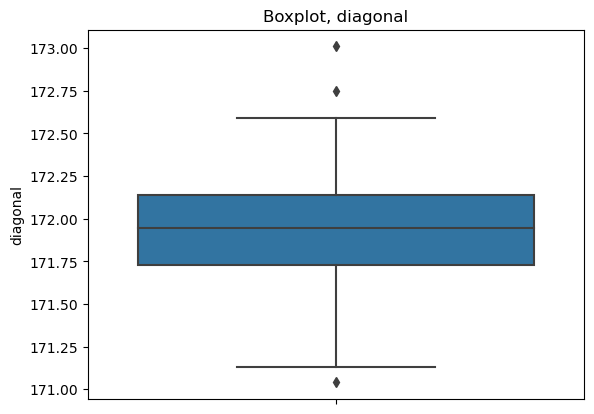

In [7]:
sns.boxplot(y=notes["diagonal"])
plt.title('Boxplot, diagonal')
plt.savefig('boxplot - diagonal')

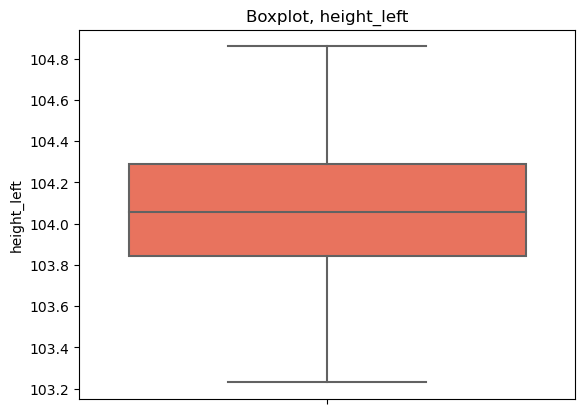

In [8]:
sns.boxplot(y=notes["height_left"], color="tomato")
plt.title('Boxplot, height_left')
plt.savefig('boxplot - height left')

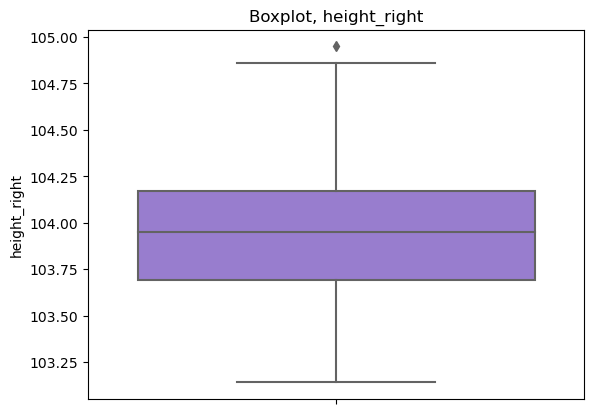

In [9]:
sns.boxplot(y=notes["height_right"], color="mediumpurple")
plt.title('Boxplot, height_right')
plt.savefig('boxplot - height_right')

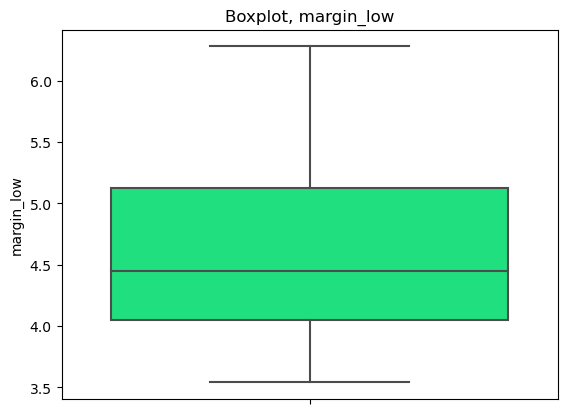

In [10]:
sns.boxplot(y=notes["margin_low"], color="springgreen")
plt.title('Boxplot, margin_low')
plt.savefig('boxplot - margin_low')

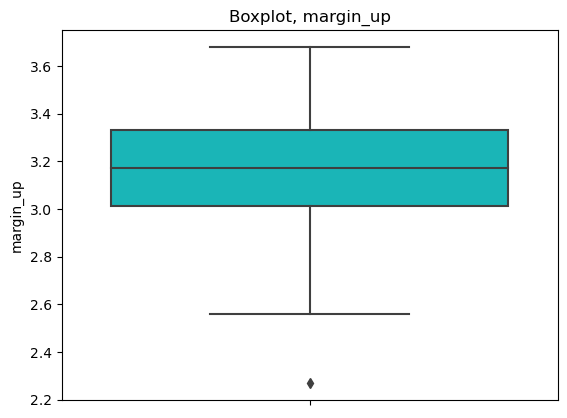

In [11]:
sns.boxplot(y=notes["margin_up"], color="darkturquoise")
plt.title('Boxplot, margin_up')
plt.savefig('boxplot - margin_up')

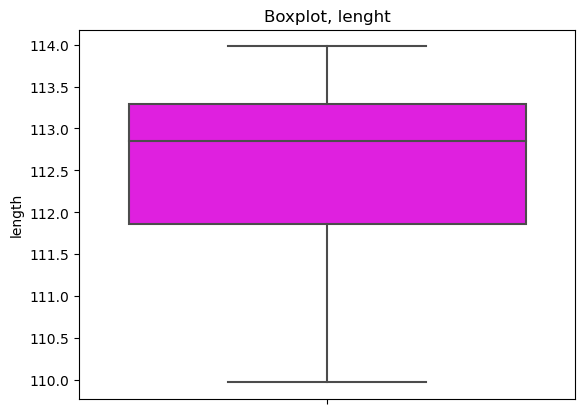

In [12]:
sns.boxplot(y=notes["length"], color="magenta")
plt.title('Boxplot, lenght')
plt.savefig('boxplot - lenght')

Représentation graphique, histogramme :

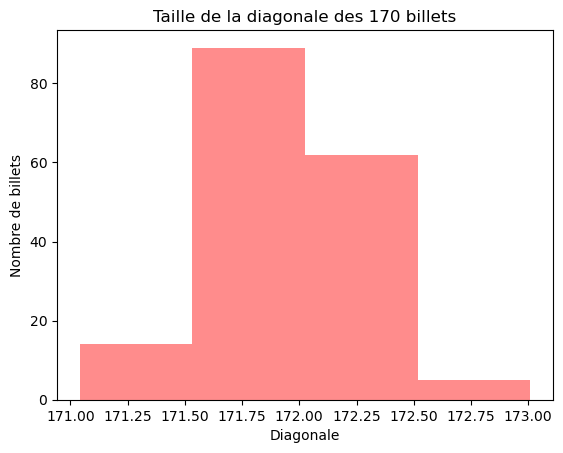

In [13]:
# histogramme, tout type de billets confondus  
plt.hist(notes['diagonal'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Diagonale')
plt.ylabel('Nombre de billets')
plt.title('Taille de la diagonale des 170 billets')
plt.savefig('histogramme - diagonal')
plt.show()

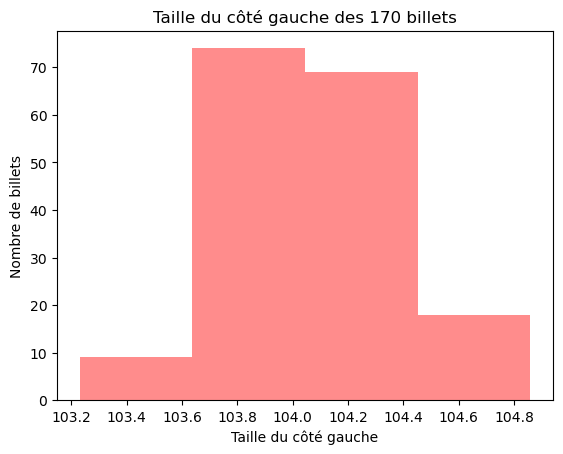

In [14]:
# histogramme, tout type de billets confondus  
plt.hist(notes['height_left'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Taille du côté gauche')
plt.ylabel('Nombre de billets')
plt.title('Taille du côté gauche des 170 billets')
plt.savefig('histogramme - height left')
plt.show()

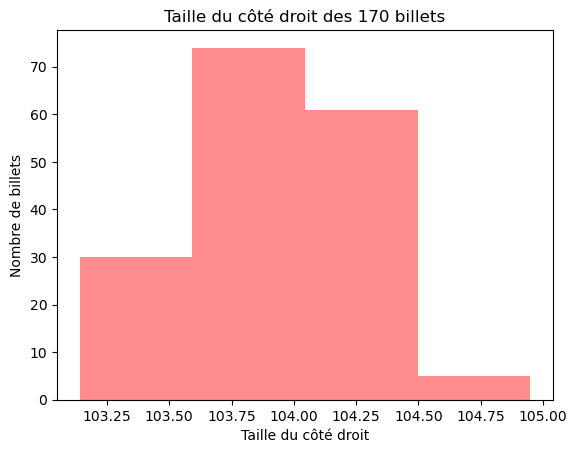

In [15]:
# histogramme, tout type de billets confondus  
plt.hist(notes['height_right'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Taille du côté droit')
plt.ylabel('Nombre de billets')
plt.title('Taille du côté droit des 170 billets')
plt.savefig('histogramme - height right')
plt.show()

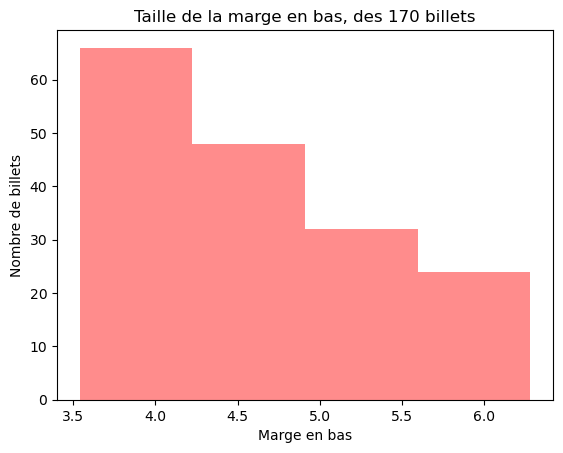

In [16]:
# histogramme, tout type de billets confondus  
plt.hist(notes['margin_low'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Marge en bas')
plt.ylabel('Nombre de billets')
plt.title('Taille de la marge en bas, des 170 billets')
plt.savefig('histogramme - margin_low')
plt.show()

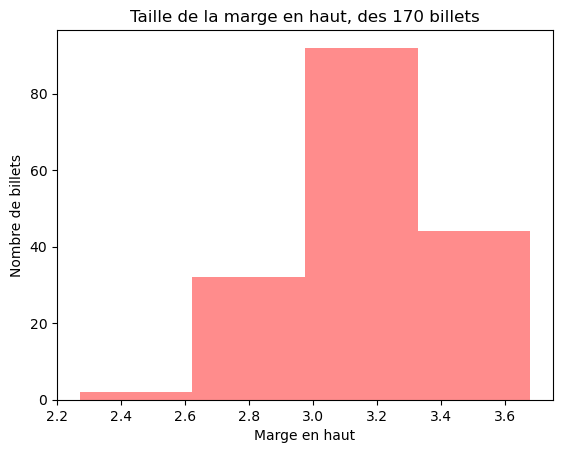

In [17]:
# histogramme, tout type de billets confondus  
plt.hist(notes['margin_up'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Marge en haut')
plt.ylabel('Nombre de billets')
plt.title('Taille de la marge en haut, des 170 billets')
plt.savefig('histogramme -margin_up')
plt.show()

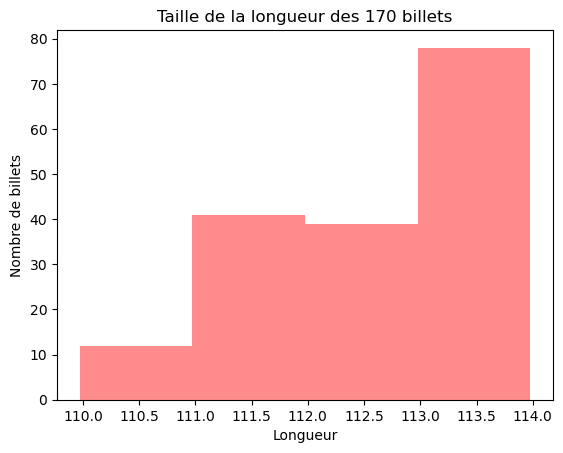

In [18]:
# histogramme, tout type de billets confondus  
plt.hist(notes['length'],bins=4, alpha = 0.45, color = 'red')
plt.xlabel('Longueur')
plt.ylabel('Nombre de billets')
plt.title('Taille de la longueur des 170 billets')
plt.savefig('histogramme - lenght')
plt.show()

## Analyse bivariée 
Nous analysons les valeurs pour chaque variable, selon le type de billets.

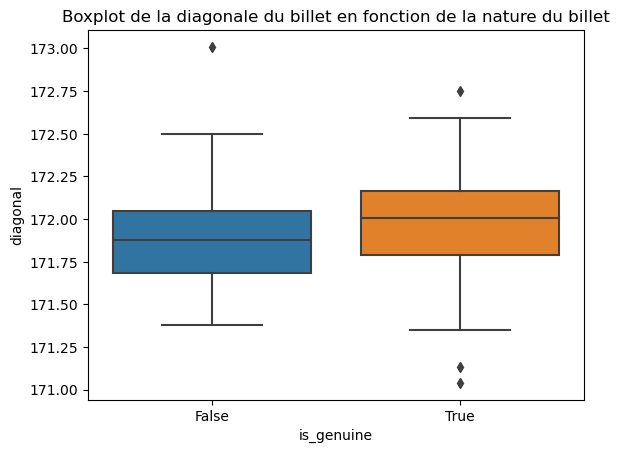

In [19]:
# boîte à moustache associée à chaque type de billets 'is_genuine', pour chaque variable
sns.boxplot(data=notes, x='is_genuine', y='diagonal')
plt.title('Boxplot de la diagonale du billet en fonction de la nature du billet')
plt.savefig('boxplot - diagonal, true, false')

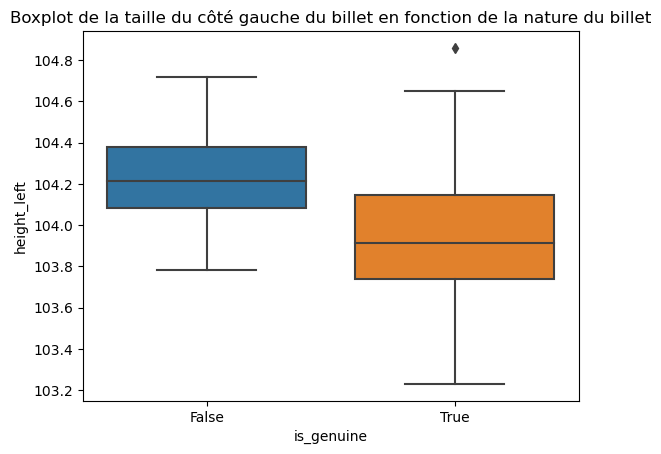

In [20]:
sns.boxplot(data=notes, x='is_genuine', y='height_left')
plt.title('Boxplot de la taille du côté gauche du billet en fonction de la nature du billet')
plt.savefig('boxplot - height_left, true, false')

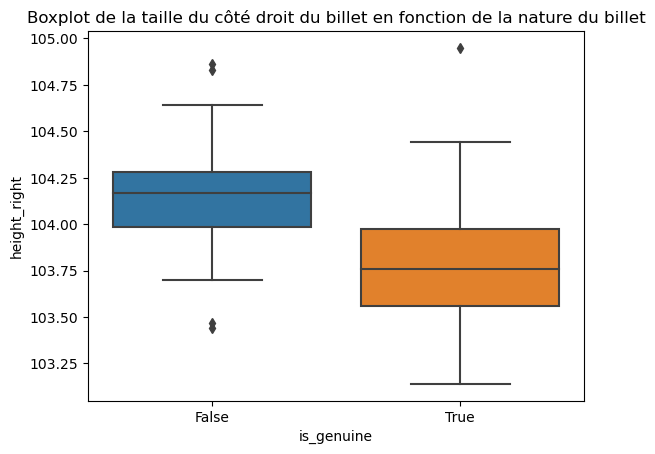

In [21]:
sns.boxplot(data=notes, x='is_genuine', y='height_right')
plt.title('Boxplot de la taille du côté droit du billet en fonction de la nature du billet')
plt.savefig('boxplot - height_right, true, false')

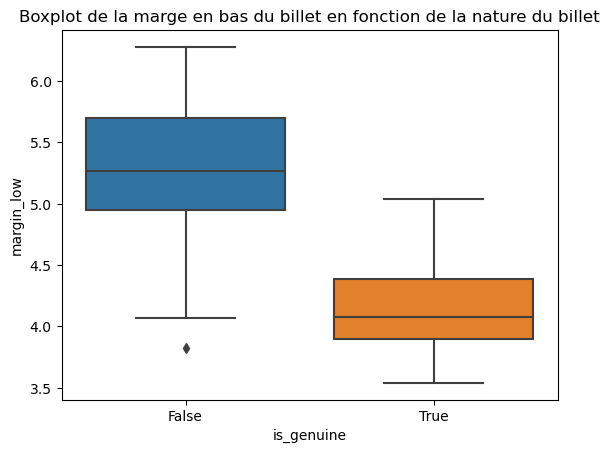

In [22]:
sns.boxplot(data=notes, x='is_genuine', y='margin_low')
plt.title('Boxplot de la marge en bas du billet en fonction de la nature du billet')
plt.savefig('boxplot - margin_low, true, false')

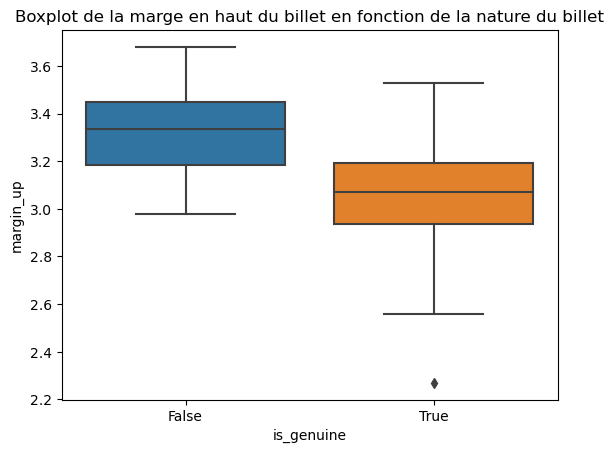

In [23]:
sns.boxplot(data=notes, x='is_genuine', y='margin_up')
plt.title('Boxplot de la marge en haut du billet en fonction de la nature du billet')
plt.savefig('boxplot - margin_up, true, false')

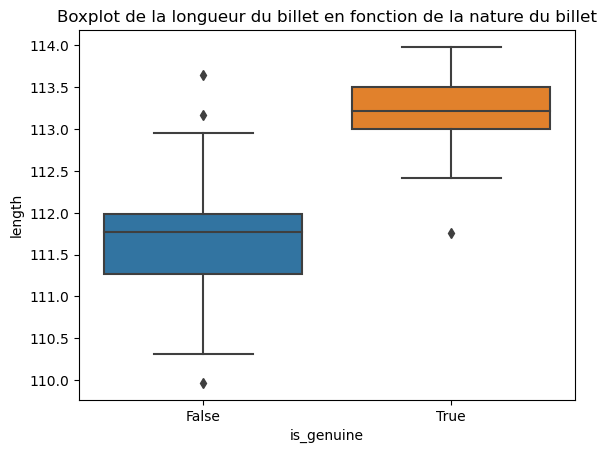

In [24]:
sns.boxplot(data=notes, x='is_genuine', y='length')
plt.title('Boxplot de la longueur du billet en fonction de la nature du billet')
plt.savefig('boxplot - lenght, true, false')

Histogramme :

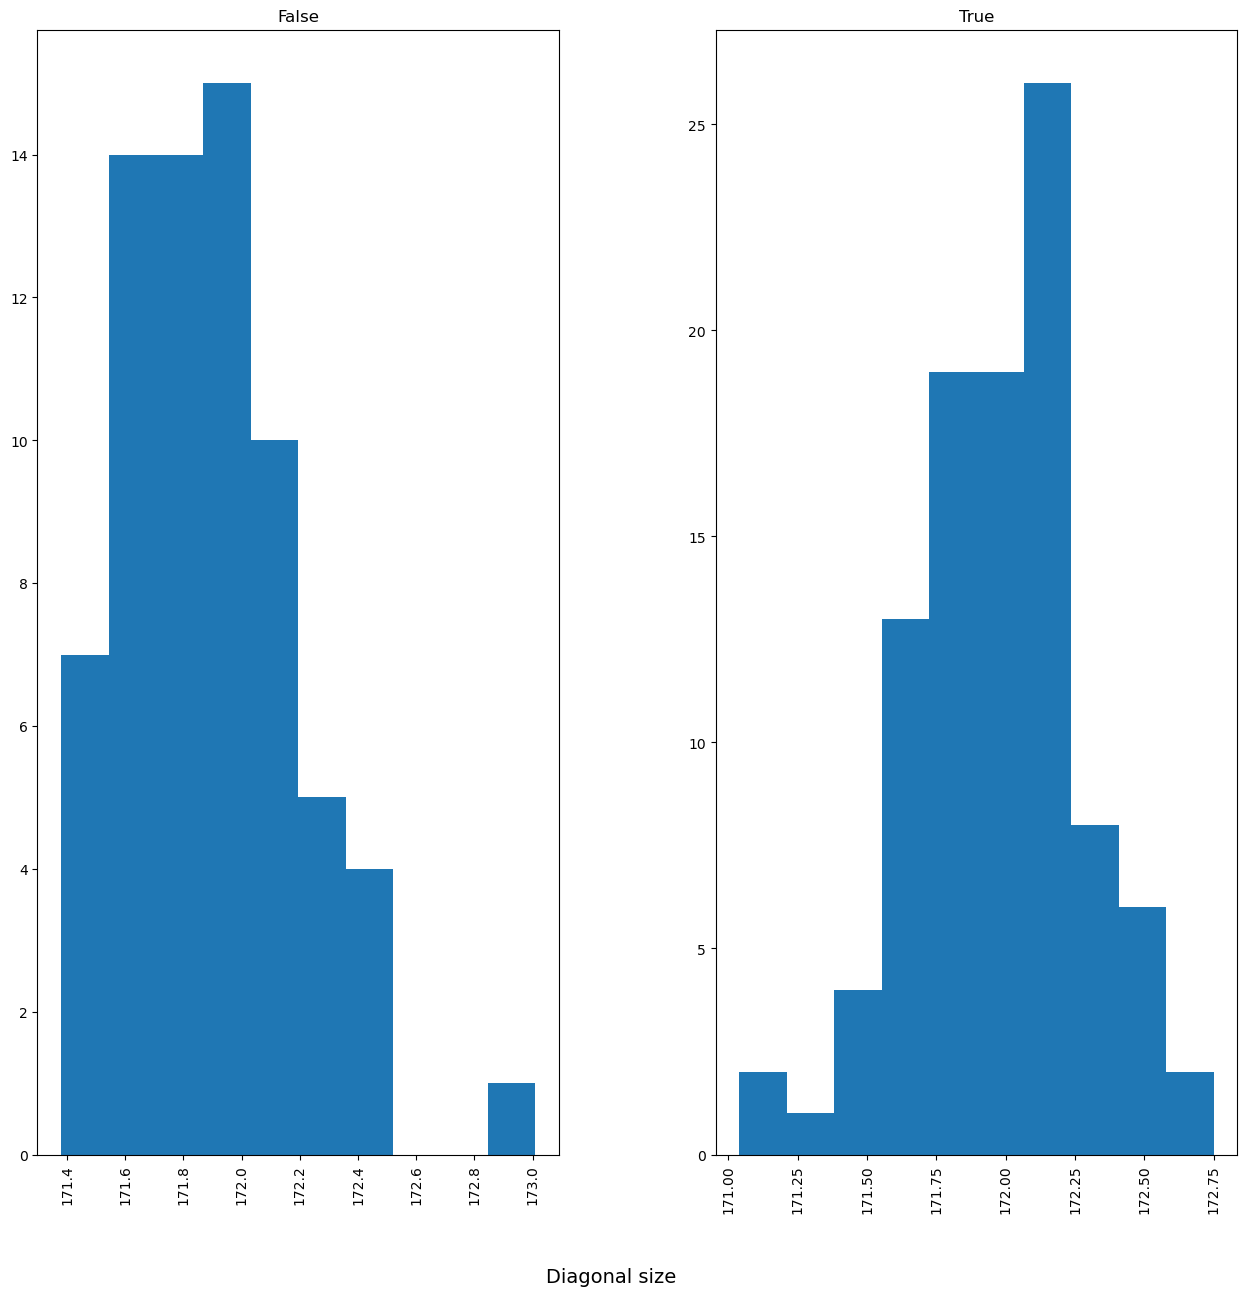

In [25]:
# histogramme associé à chaque type de billets ('vrai ou faux') pour la variable 'diagonal'
fig, ax = notes['diagonal'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Diagonal size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - diagonal, true, false')

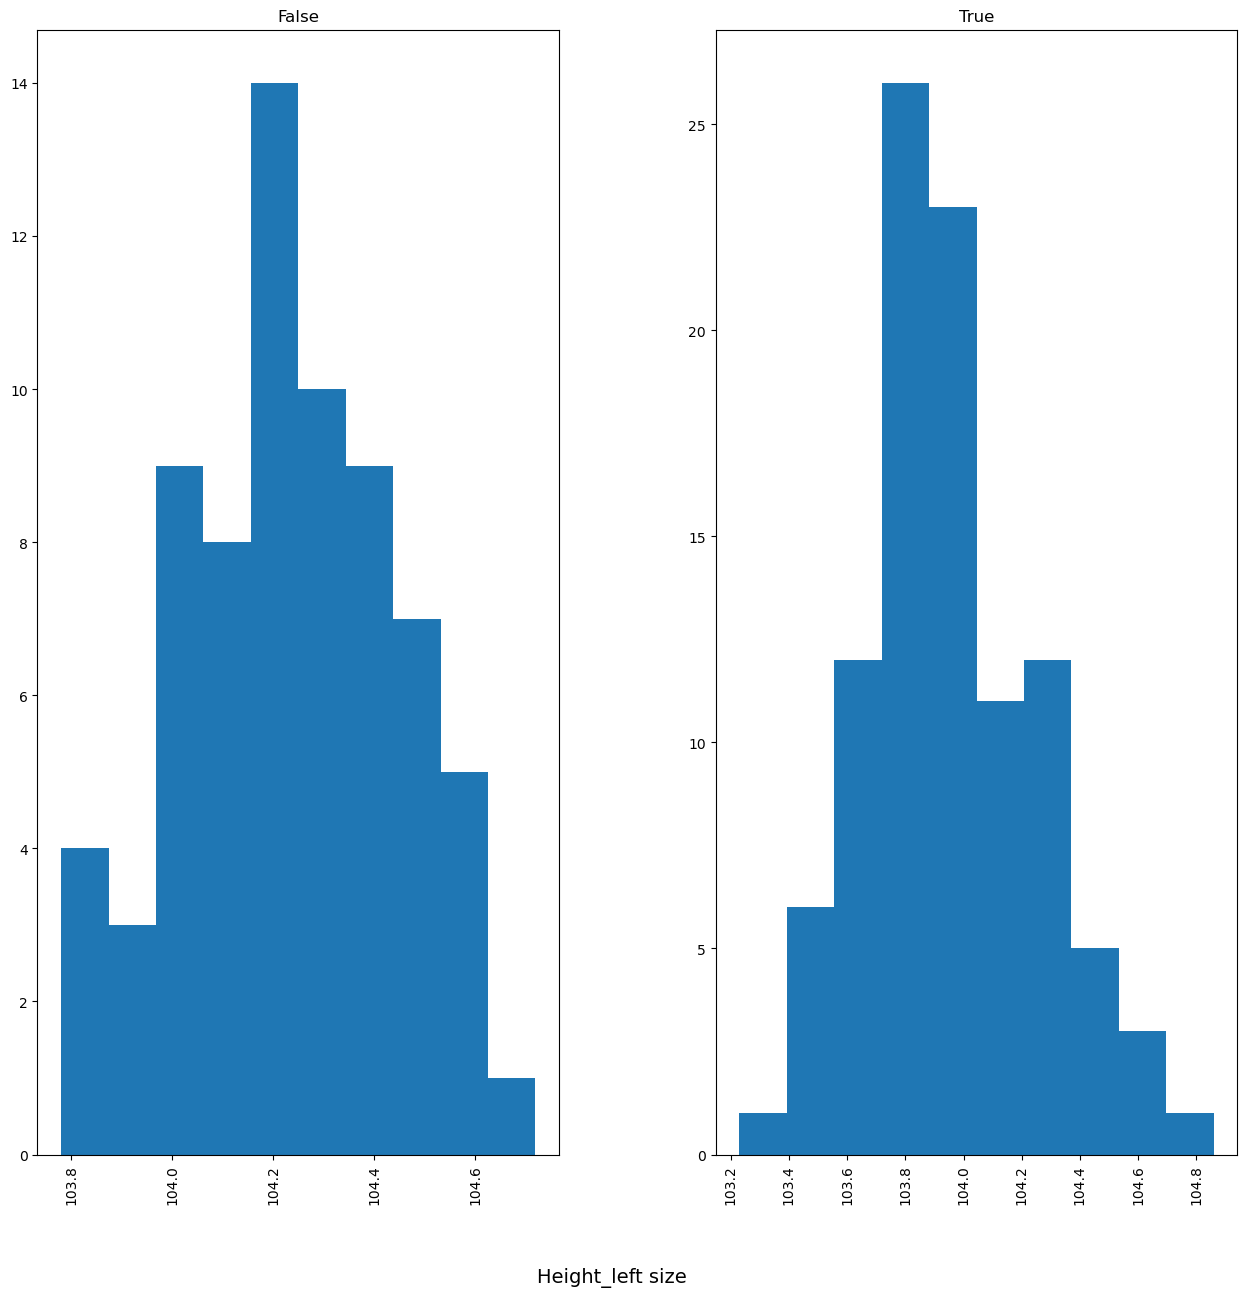

In [26]:
fig, ax = notes['height_left'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Height_left size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - height-left, true, false')

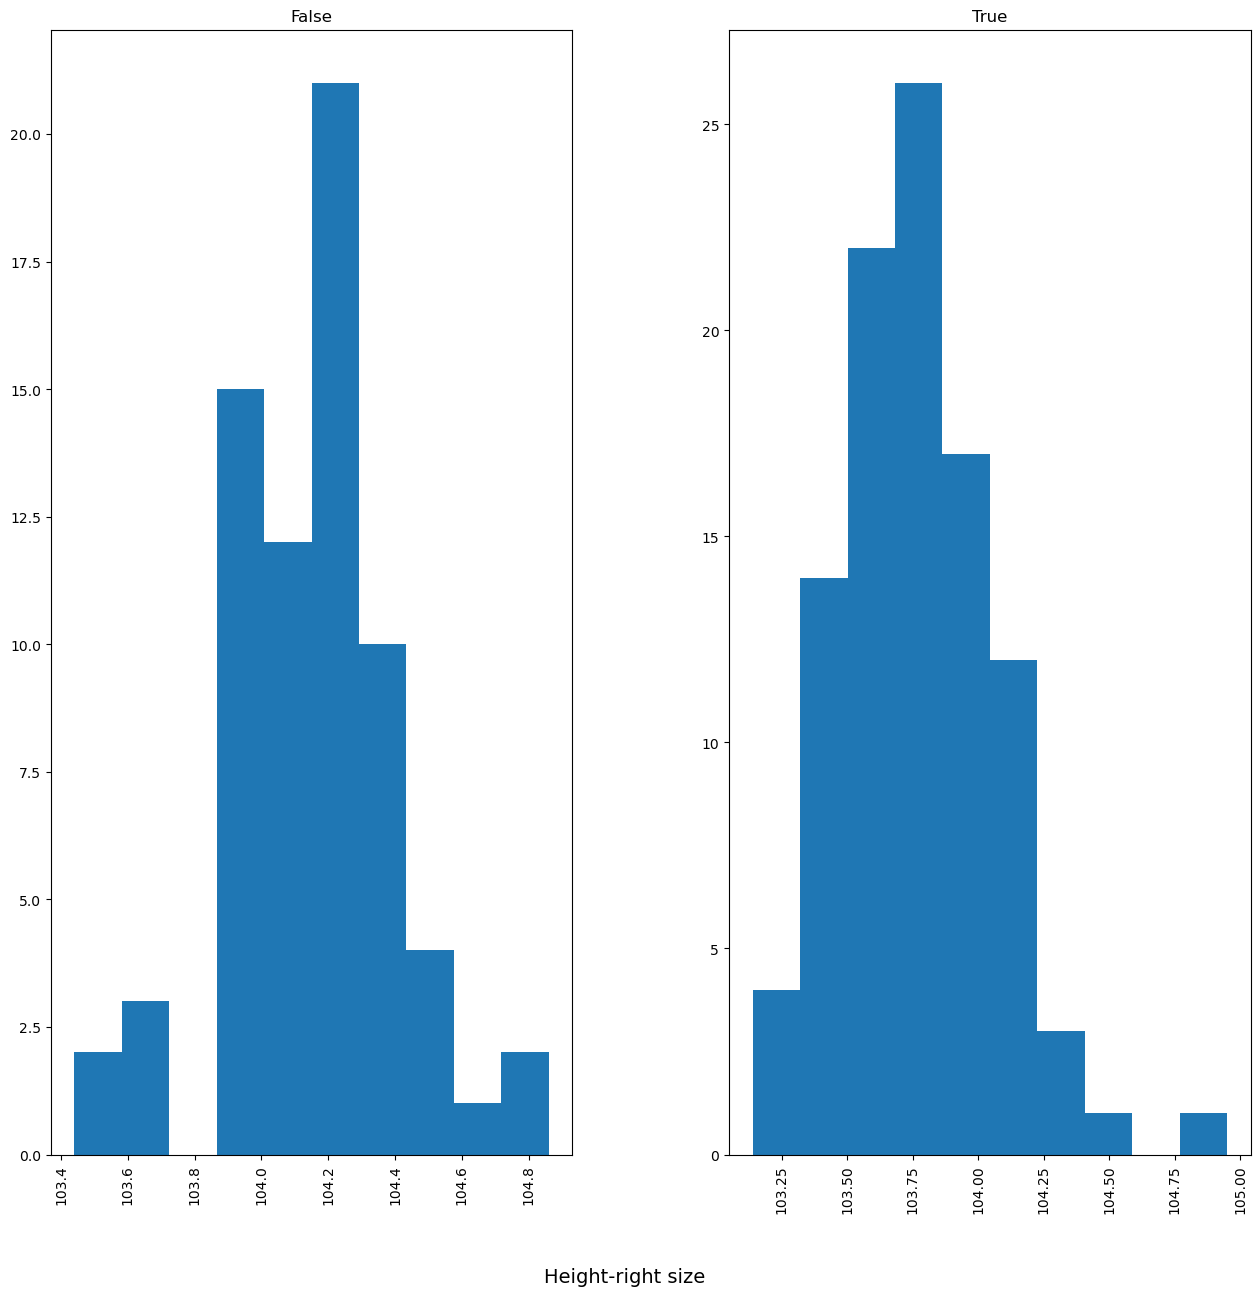

In [27]:
fig, ax = notes['height_right'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Height-right size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - height right, true, false')

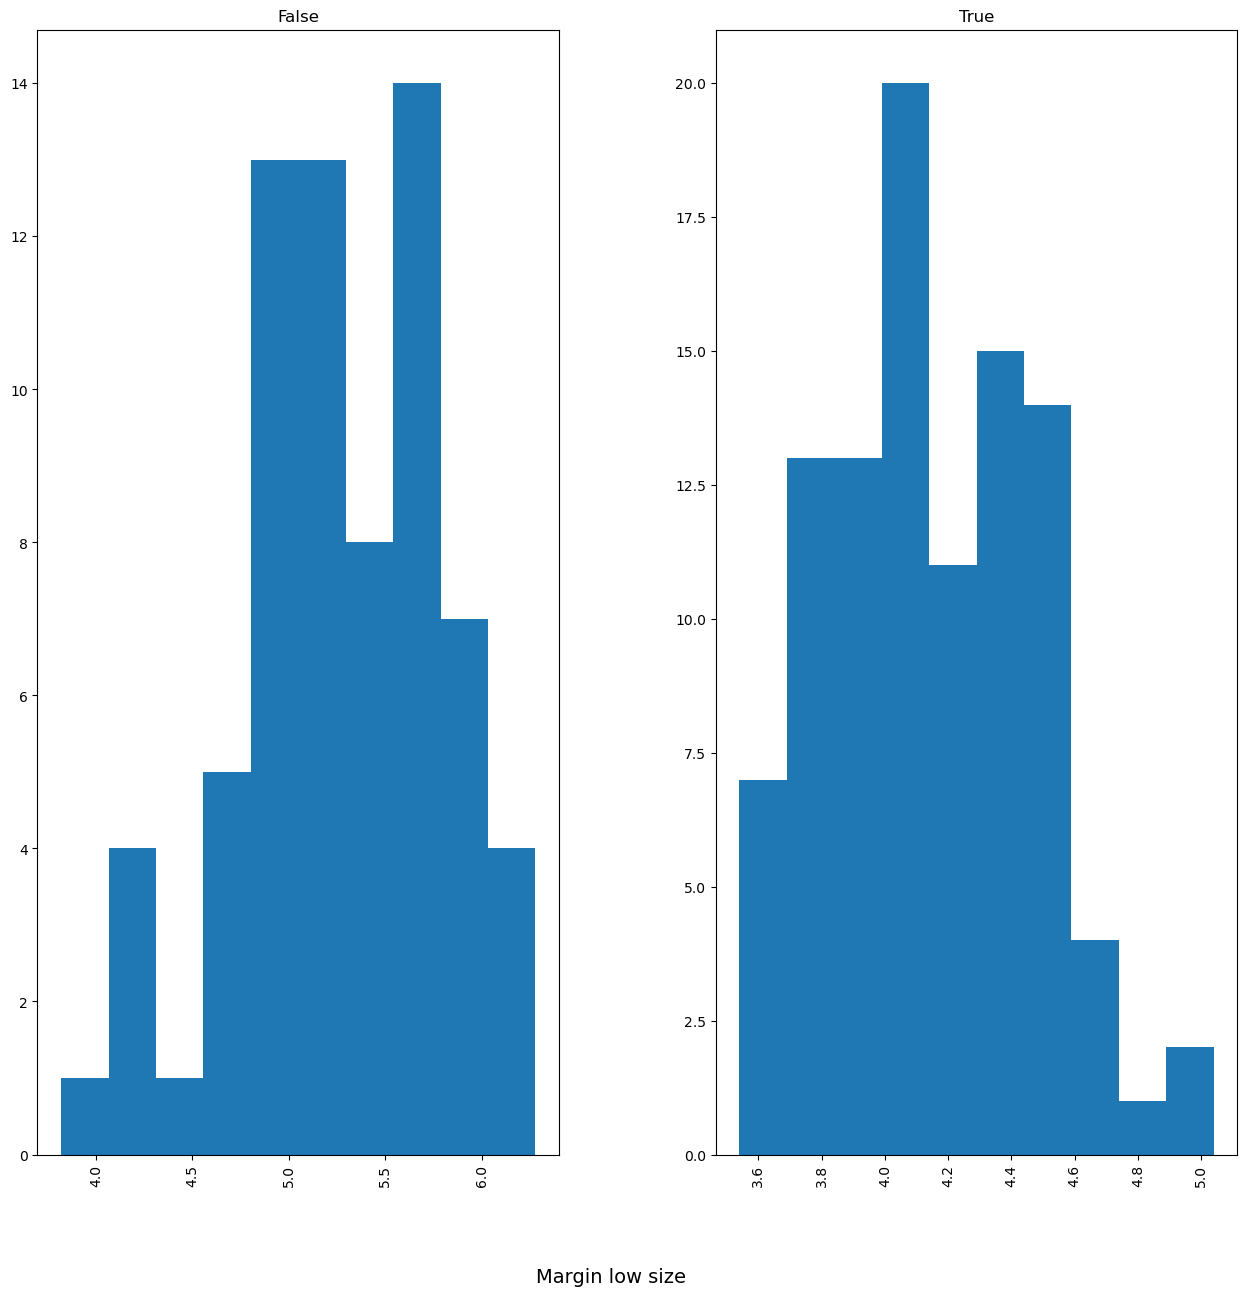

In [28]:
fig, ax = notes['margin_low'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Margin low size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - margin_low, true, false')

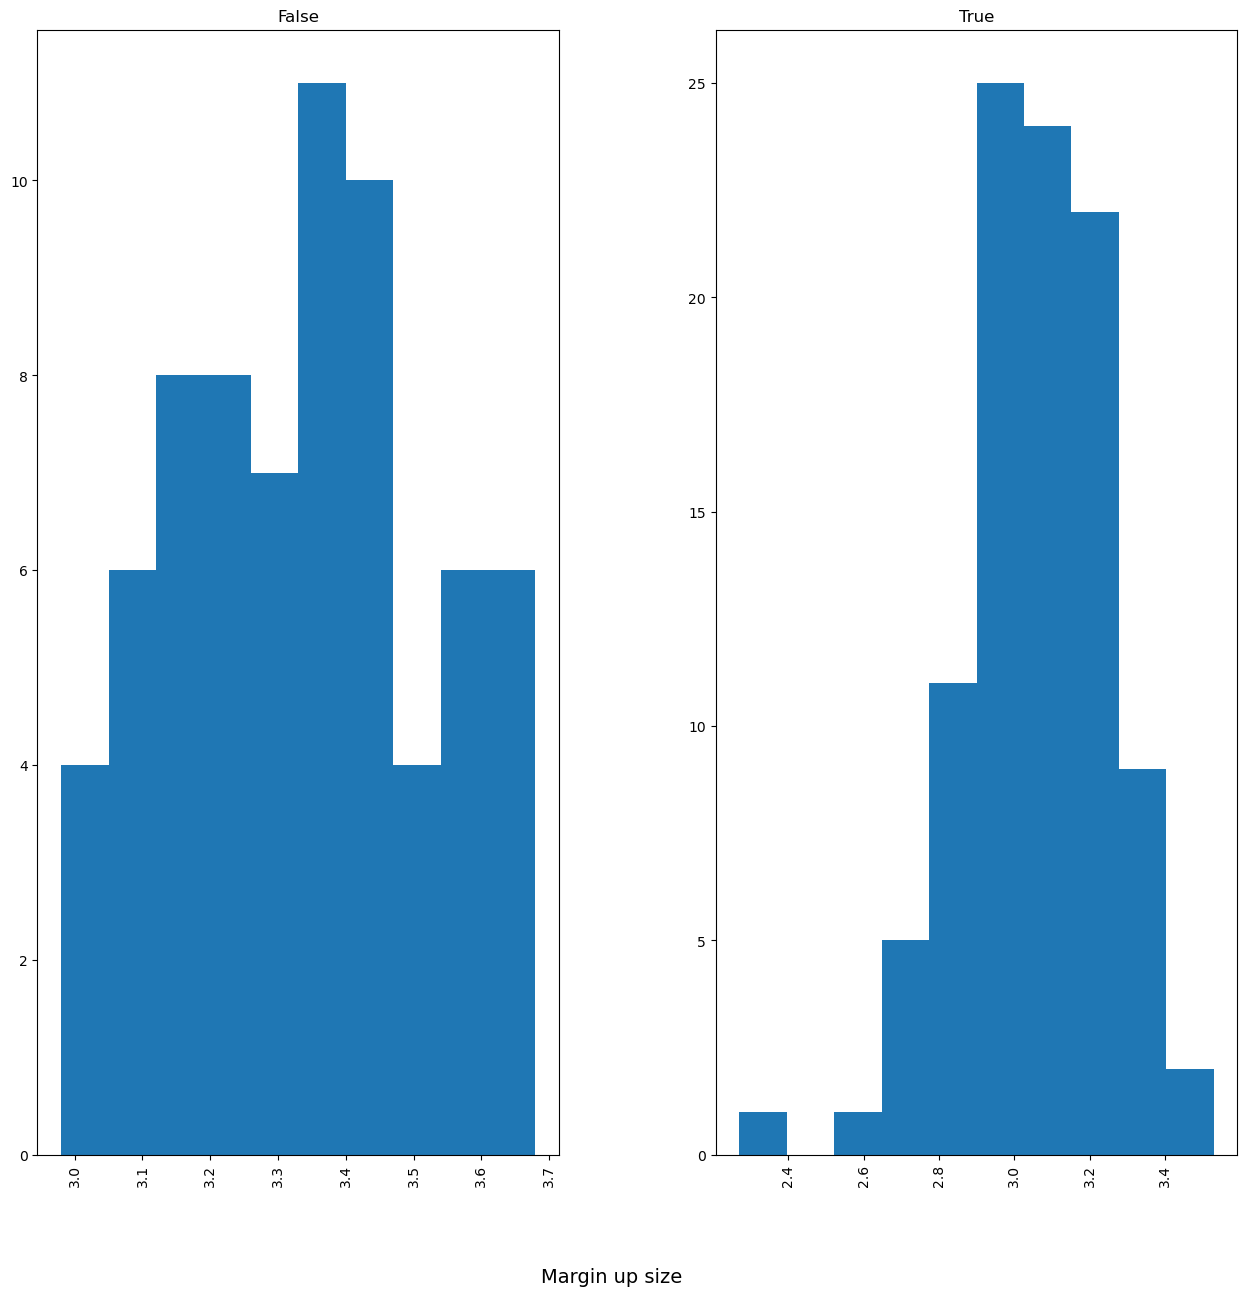

In [29]:
fig, ax = notes['margin_up'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Margin up size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - margin_up, true, false')

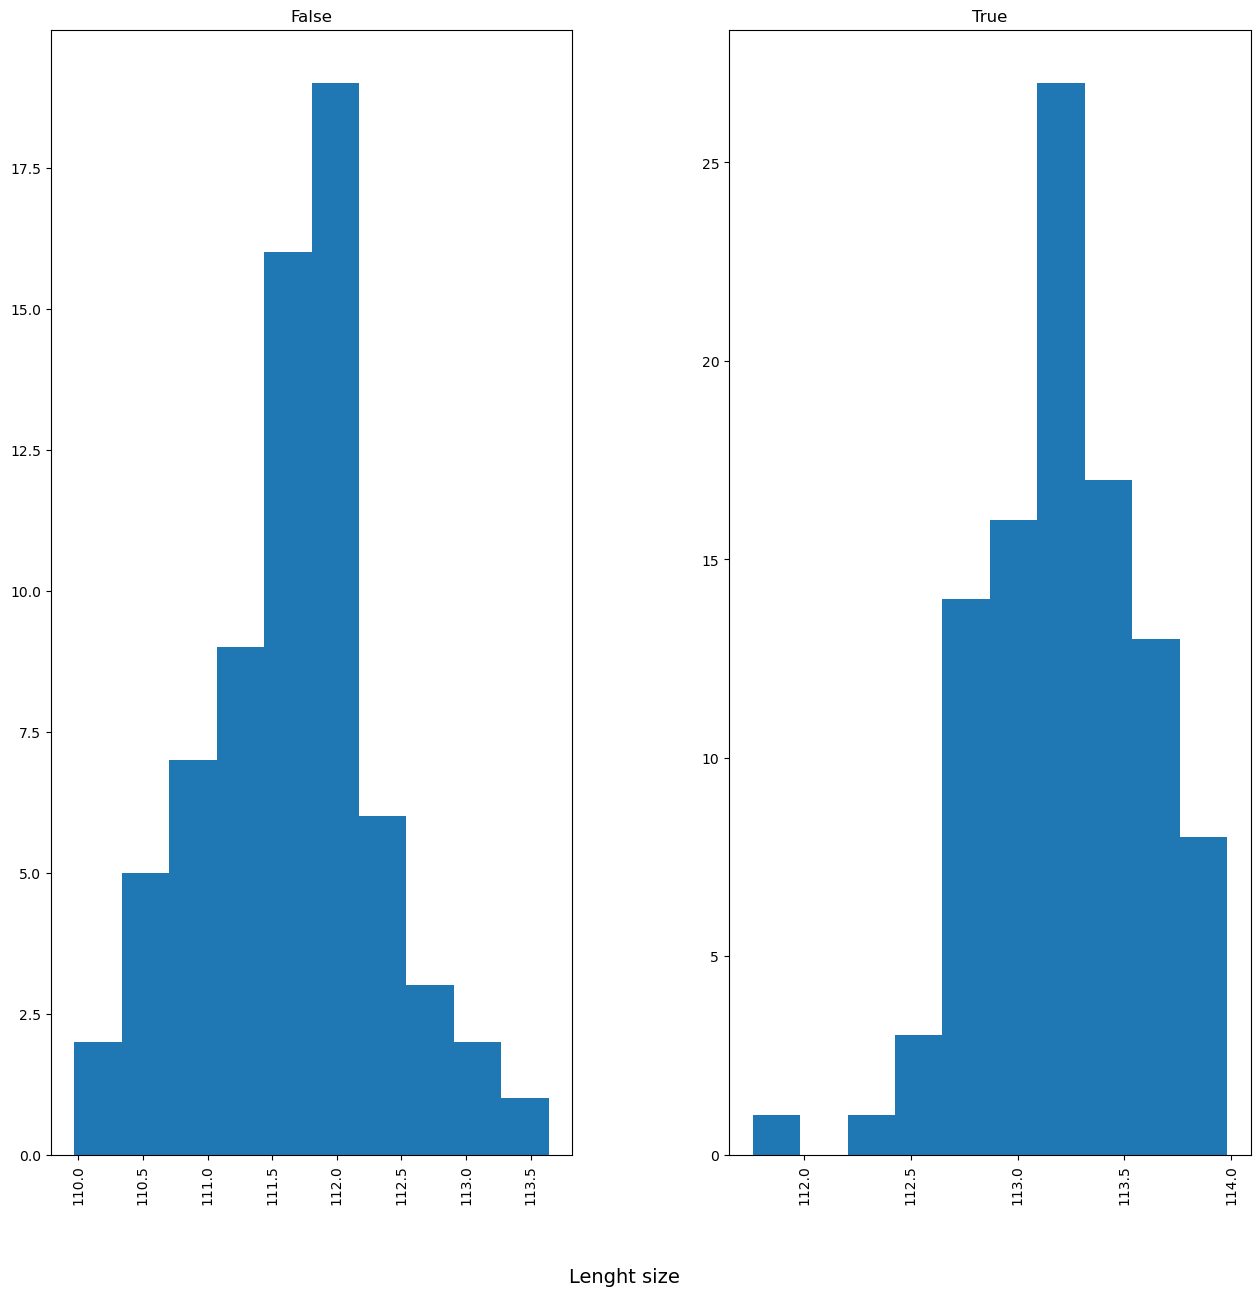

In [30]:
fig, ax = notes['length'].hist(by=notes['is_genuine'], figsize=(15,15))
ax.set_xlabel('Lenght size', fontsize = 14)
ax.xaxis.set_label_coords(-0.2, -.1)
plt.savefig('histogram - lenght, true, false')

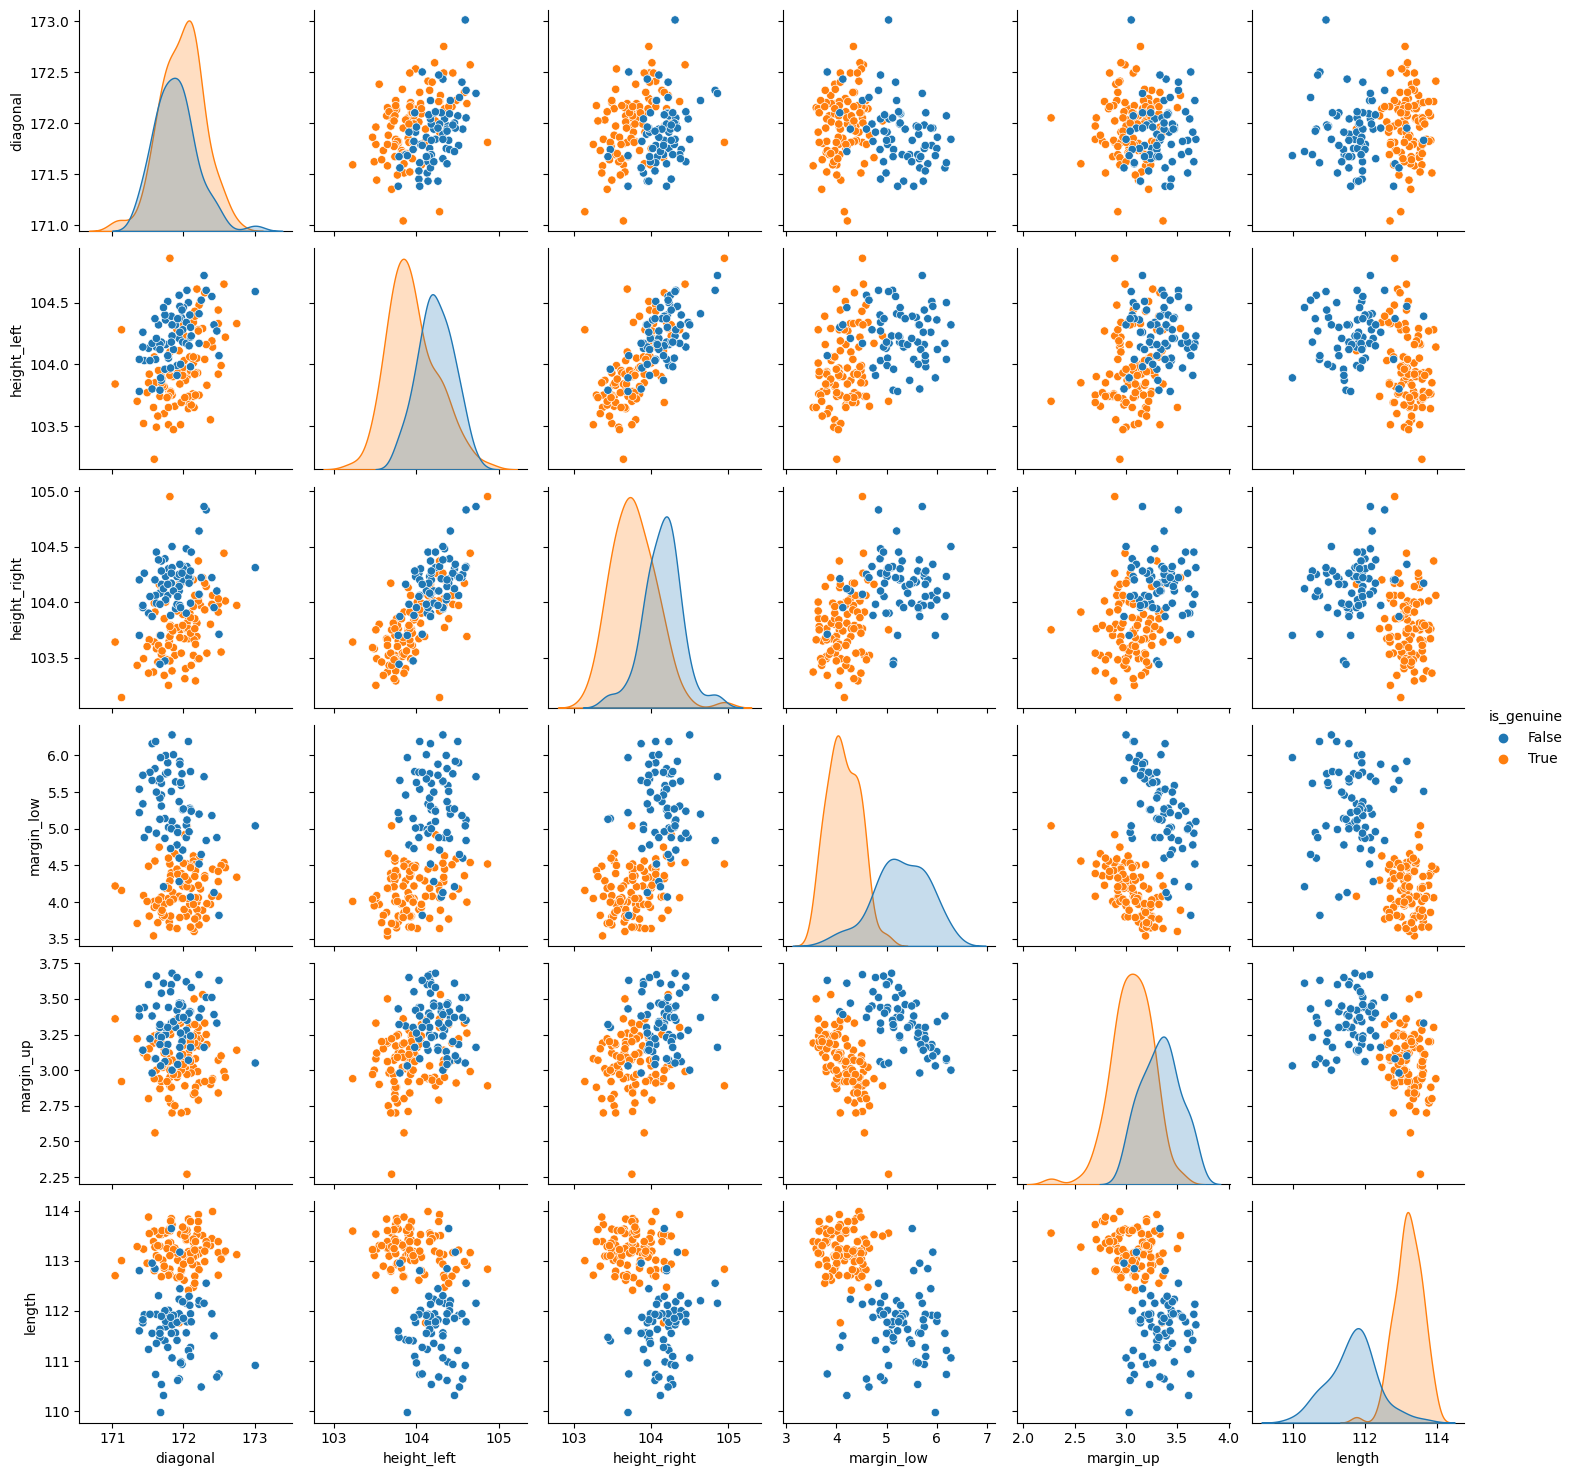

In [31]:
sns.pairplot(notes, hue='is_genuine')
plt.xlabel('Pairplot', fontsize = 14)
plt.savefig('pairplot per variables')

### Réalisation d'un dendrogrogramme (CAH)

#### CAH : on prépare les données pour réaliser la classification ascendante hiérarchique.

In [32]:
def plot_dendrogram(X, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        X,
        labels = names,
        orientation = "left",
    )
    plt.show()
from sklearn import preprocessing

In [33]:
notes.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [34]:
dataset = notes.copy()
dataset = dataset[['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      170 non-null    float64
 1   height_left   170 non-null    float64
 2   height_right  170 non-null    float64
 3   margin_low    170 non-null    float64
 4   margin_up     170 non-null    float64
 5   length        170 non-null    float64
dtypes: float64(6)
memory usage: 8.1 KB


On importe au préalable les valeurs avant de les centrer-réduire :

In [35]:
stock_donnees = dataset.values
stock_donnees

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.67, 103.74, 103.7 ,   4.01,   2.87, 113.29],
       [171.83, 103.76, 103.76,   4.4 ,   2.88, 113.84],
       ...,
       [172.47, 104.27, 104.1 ,   4.88,   3.33, 110.68],
       [171.82, 103.97, 103.88,   4.73,   3.55, 111.87],
       [171.96, 104.  , 103.95,   5.63,   3.26, 110.96]])

In [36]:
# centrage et réduction
std_scale = preprocessing.StandardScaler().fit(stock_donnees)
data_scaled = std_scale.transform(stock_donnees)
data_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [37]:
# clustering hiérarchique

# on coupe "visuellement" le cluster en 2
X = linkage(data_scaled ,'ward')

In [38]:
# à une distance de 13.3 cm, il y a une distance de 13 cm entre le 1er et le 2e cluster
max_d = 16 #seuil 

In [39]:
font = {'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
fontbis = {'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

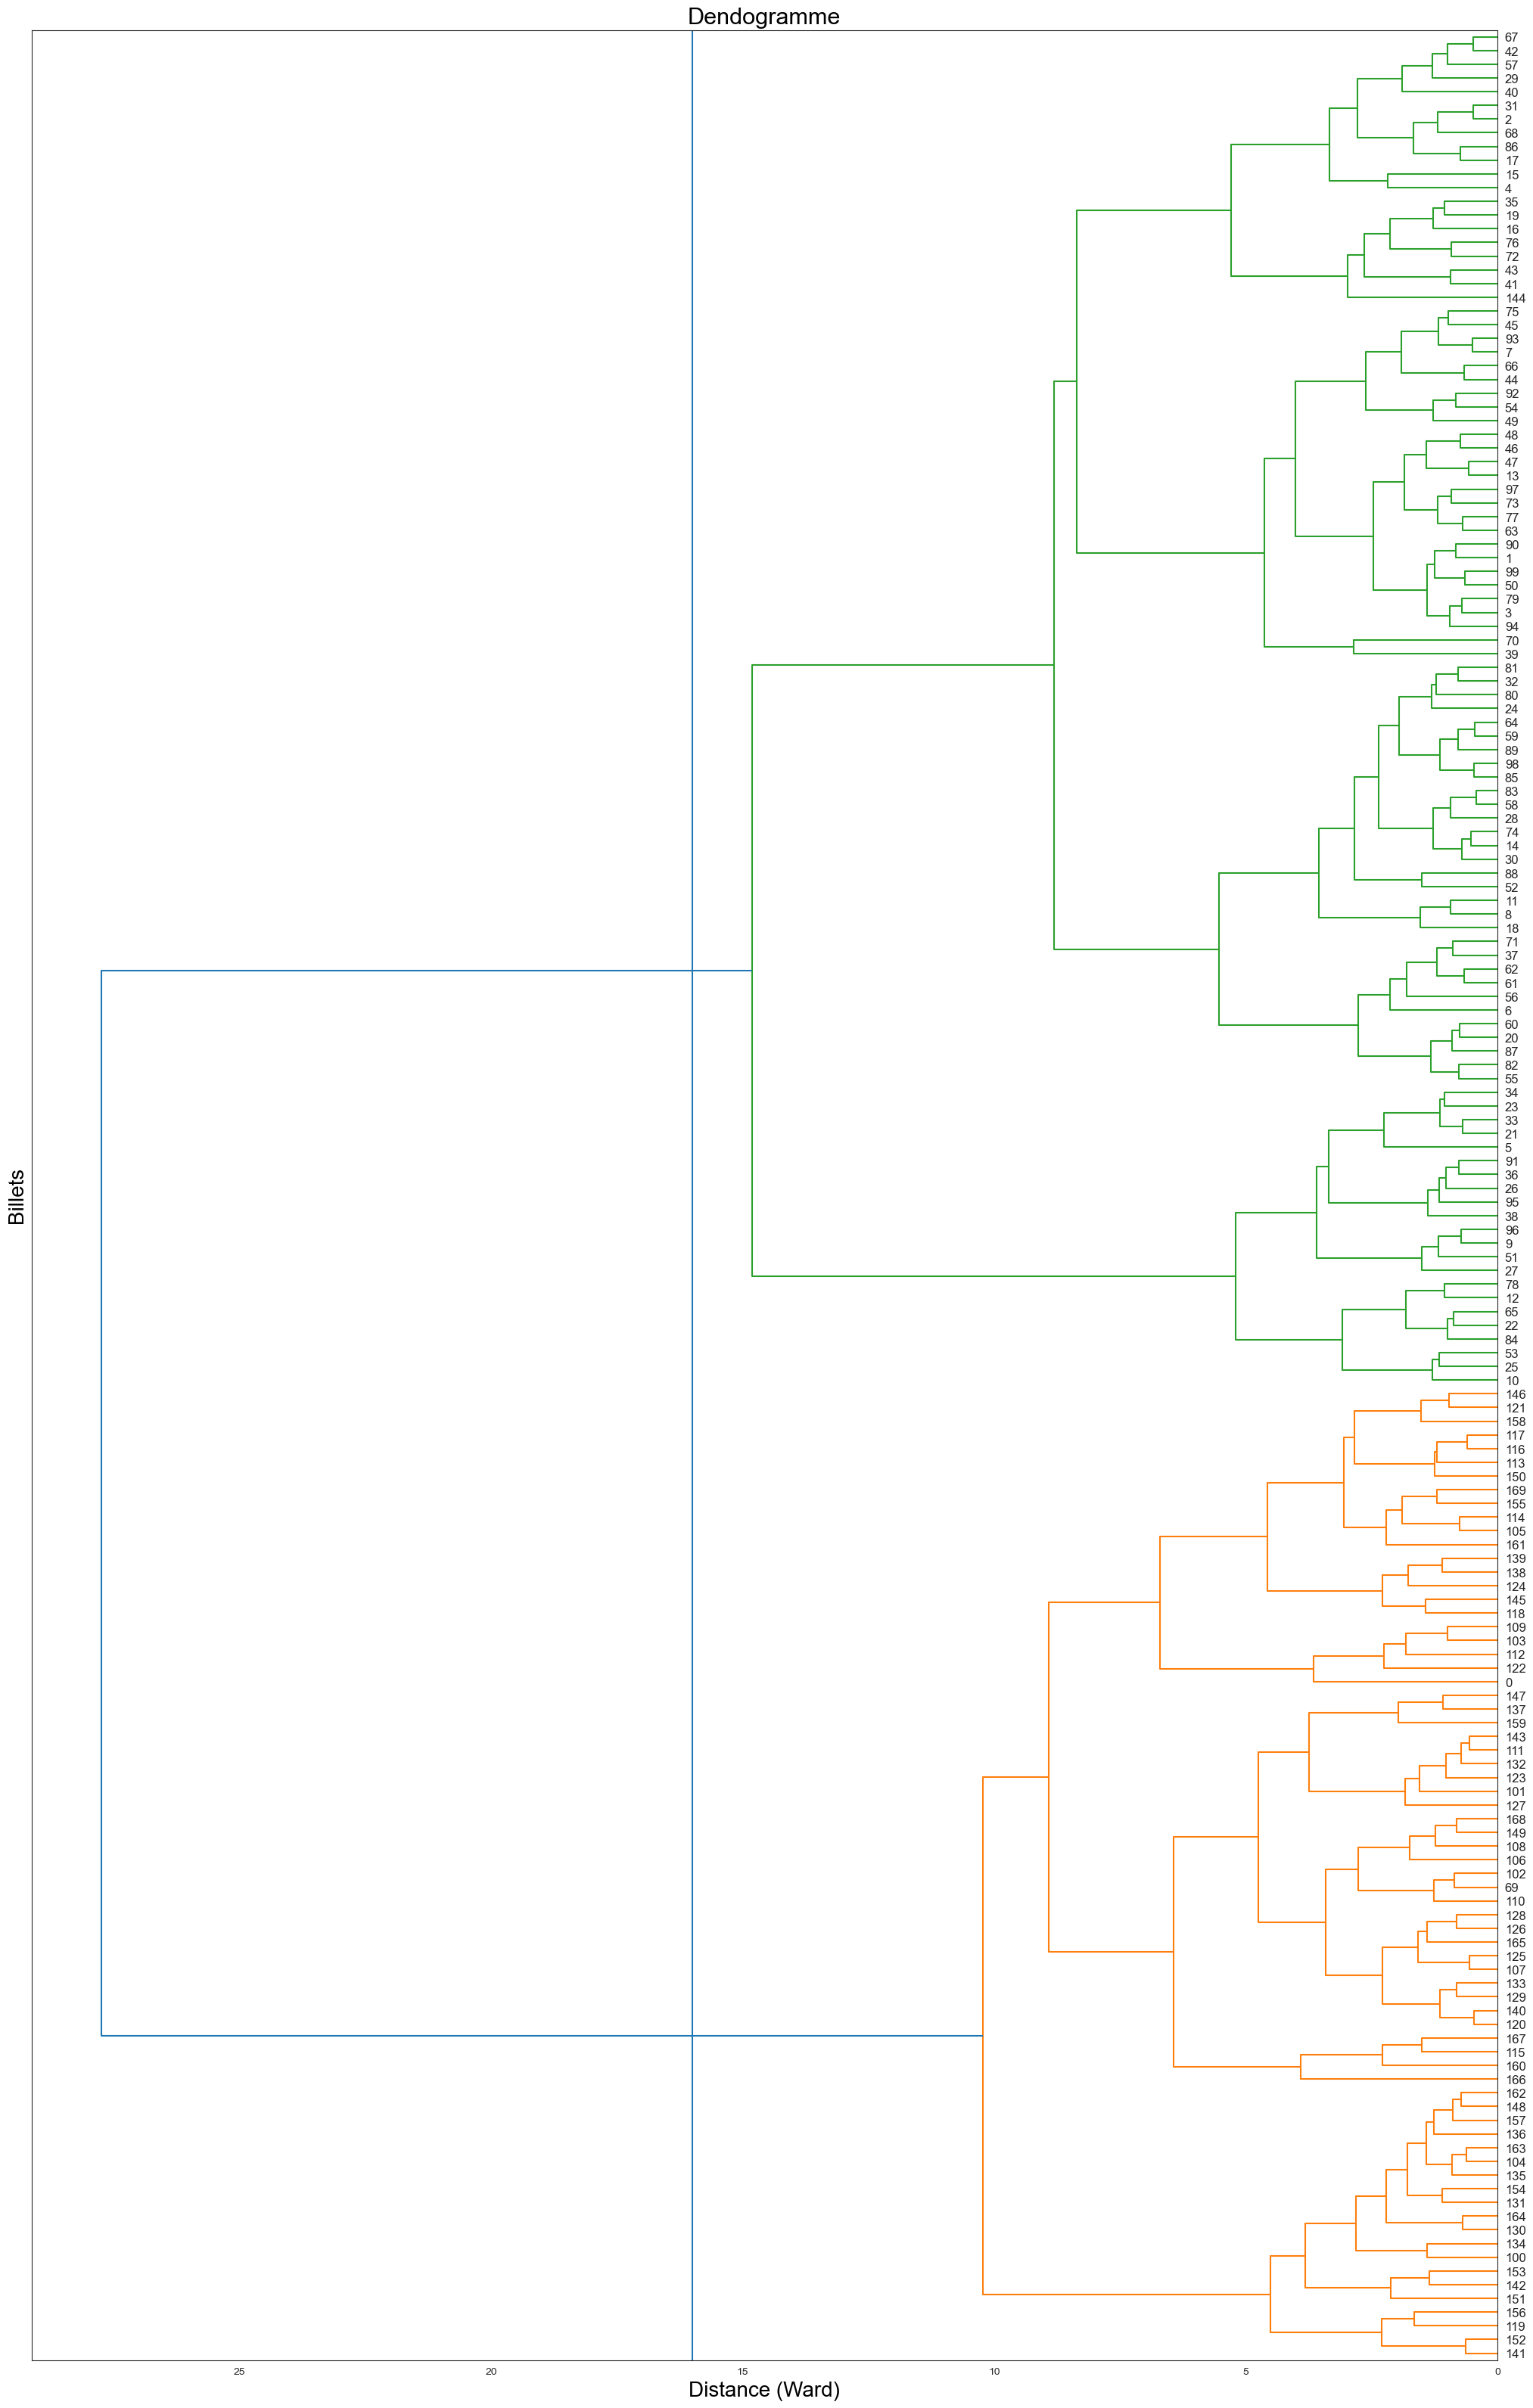

In [40]:
fig =plt.figure(figsize=(25,40))
sns.set_style('white')

# Plot axis labels
plt.ylabel('Billets', fontdict=fontbis)
plt.xlabel('Distance (Ward)', fontdict=fontbis)
plt.title('Dendogramme', fontdict=font)

# Make the dendrogram
dendrogram(X, labels=dataset.index, leaf_font_size=12, orientation='left')

plt.axvline(x=max_d)

plt.savefig("Dendrogramme_billets.jpg", dpi='figure', format='jpg')

# Show the graph
plt.show()

In [41]:
# on définit des clusters, ici 5 avec pour maximum le nombre de clusters choisis
# en utilisation fcluster

groupes = fcluster(X, 2, criterion='maxclust')
groupes

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
# on stocke le numéro des billets
names = dataset.index
names

RangeIndex(start=0, stop=170, step=1)

In [43]:
billets = pd.DataFrame({"cluster" : groupes})
billets

,cluster
0,1
1,2
2,2
3,2
4,2
...,...
165,1
166,1
167,1
168,1


In [44]:
dataset

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78
166,173.01,104.59,104.31,5.04,3.05,110.91
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [45]:
# DF comprenant clusters + variables initiales
clustering = pd.merge(billets, dataset, left_index=True, right_index=True)
clustering

,cluster,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,2,171.67,103.74,103.70,4.01,2.87,113.29
2,2,171.83,103.76,103.76,4.40,2.88,113.84
3,2,171.80,103.78,103.65,3.73,3.12,113.63
4,2,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,1,172.11,104.23,104.45,5.24,3.58,111.78
166,1,173.01,104.59,104.31,5.04,3.05,110.91
167,1,172.47,104.27,104.10,4.88,3.33,110.68
168,1,171.82,103.97,103.88,4.73,3.55,111.87


In [46]:
clustering['cluster'].values

#1 == Faux
#2 == Vrai

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
clustering.shape

(170, 7)

In [48]:
notes.shape

(170, 7)

In [49]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cluster       170 non-null    int32  
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.8 KB


### Réalisation d'une ACP (sur la base du cours de Ricco)

#### Préparation des données :

In [50]:
D = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

In [51]:
D

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78
166,173.01,104.59,104.31,5.04,3.05,110.91
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [52]:
#dimension
print(D.shape) 
#nombre d'observations
n = D.shape[0]
#nombre de variables
p = D.shape[1]
#affichage des données
print(D)

(170, 6)
     diagonal  height_left  height_right  margin_low  margin_up  length
0      171.81       104.86        104.95        4.52       2.89  112.83
1      171.67       103.74        103.70        4.01       2.87  113.29
2      171.83       103.76        103.76        4.40       2.88  113.84
3      171.80       103.78        103.65        3.73       3.12  113.63
4      172.05       103.70        103.75        5.04       2.27  113.55
..        ...          ...           ...         ...        ...     ...
165    172.11       104.23        104.45        5.24       3.58  111.78
166    173.01       104.59        104.31        5.04       3.05  110.91
167    172.47       104.27        104.10        4.88       3.33  110.68
168    171.82       103.97        103.88        4.73       3.55  111.87
169    171.96       104.00        103.95        5.63       3.26  110.96

[170 rows x 6 columns]


In [53]:
p

6

In [54]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) 

1.0.2


In [55]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(D)
print(Z)

[[-0.42834385  2.6694537   3.09656321 -0.13159013 -1.18987367  0.28163308]
 [-0.88755932 -1.09769709 -0.69125444 -0.86012554 -1.27473985  0.78069736]
 [-0.36274164 -1.03042654 -0.50943919 -0.30301023 -1.23230676  1.37740465]
 ...
 [ 1.73652911  0.68497248  0.52084721  0.38267015  0.67718214 -2.05094997]
 [-0.39554274 -0.32408577 -0.1458087   0.16839504  1.61071005 -0.75989238]
 [ 0.06367273 -0.22317994  0.06630909  1.45404575  0.38015054 -1.74717171]]


In [56]:
#moyenne
print(np.mean(Z,axis=0))
# Les moyennes sont nulles après centrage réduction, bien que ce  n'était pas nécessaire car elles sont déjà dans
# la même unité

[ 7.69580478e-15  3.14728635e-14  3.61958829e-14  7.52339367e-16
 -1.50467873e-15 -1.37510918e-14]


In [57]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


### Mission 1 : Analyse en composantes principales avec PCA de ‘’scikit-learn’’ 

#### Instanciation et lancement des calculs :

In [58]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [59]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [60]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [61]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6

6


#### Valeurs propres et scree plot :

In [62]:
#variance expliquée
print(acp.explained_variance_)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


In [63]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.84687523 1.31742636 0.85407146 0.51157773 0.27676935 0.19327987]


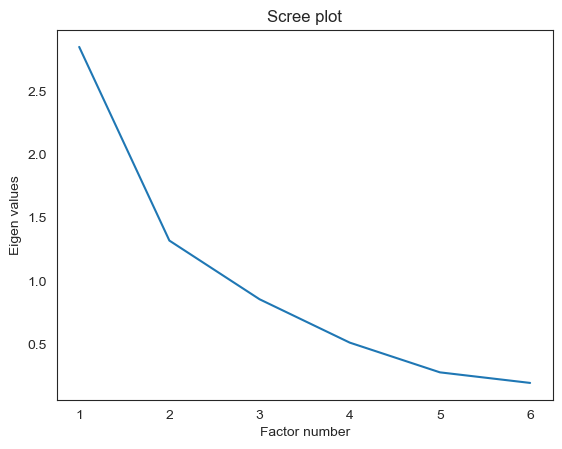

In [64]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree plot')
plt.show()

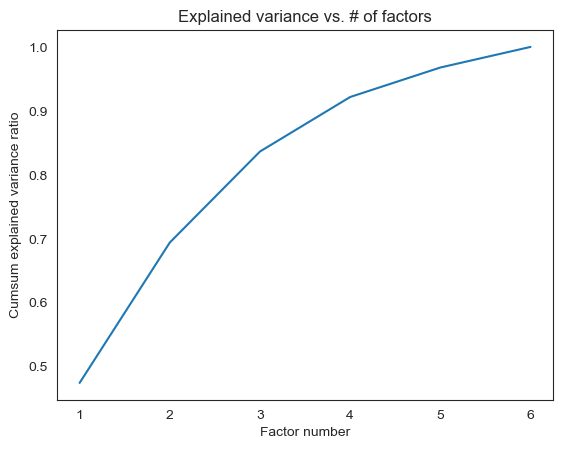

In [65]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Explained variance')
plt.show()

In [66]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [67]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.846875  2.450000
1    1.317426  1.450000
2    0.854071  0.950000
3    0.511578  0.616667
4    0.276769  0.366667
5    0.193280  0.166667


### Représentation des individus :

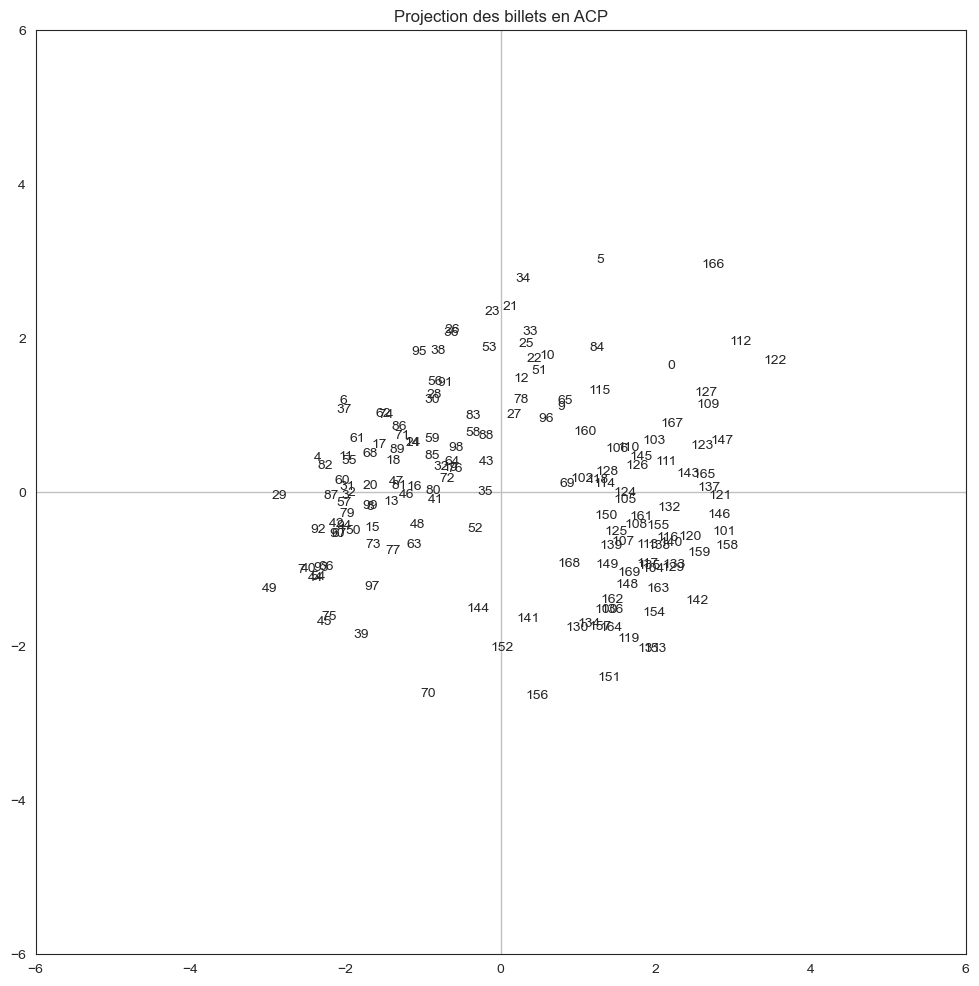

<Figure size 640x480 with 0 Axes>

In [68]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(D.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

axes.set_title('Projection des billets en ACP')


#affichage
plt.show()

plt.savefig("Représentation des individus", dpi='figure', format='pdf')

# next step : colorier les points 

On dingue deux groupes de billets.

### Représentation des variables :

In [69]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
 [ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]
 [-0.08889419  0.12276016  0.15383022  0.5128076  -0.82114881  0.12691346]
 [-0.55973158  0.2780463   0.45893794 -0.22652773  0.13533955  0.57370304]
 [-0.22509444  0.71592059 -0.48699285 -0.31190784 -0.1939426  -0.25441684]
 [ 0.12216606  0.23213146 -0.4808135   0.54763041  0.35437971  0.52395111]]


In [70]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [71]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.1236346   0.89486346 -0.08215244 -0.40034612 -0.11841965  0.05370861]
 [ 0.80229967  0.38938864  0.11345001  0.19887167  0.37663775  0.10205336]
 [ 0.8298348   0.27035382  0.14216371  0.32825381 -0.25620145 -0.21138296]
 [ 0.72725782 -0.36790977  0.4739162  -0.16202319 -0.1640912   0.24075808]
 [ 0.59482939 -0.1619761  -0.75887278  0.09680115 -0.10203101  0.15579811]
 [-0.78520903  0.36102241  0.11728832  0.41033916 -0.13384583  0.23034781]]


In [72]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

             id     COR_1     COR_2
0      diagonal  0.123635  0.894863
1   height_left  0.802300  0.389389
2  height_right  0.829835  0.270354
3    margin_low  0.727258 -0.367910
4     margin_up  0.594829 -0.161976
5        length -0.785209  0.361022


- F1 : 
Le premier axe d'inertie est très corrélé à la hauteur à gauche et à droite des billets. 
Ainsi qu'à la marge en haut et en bas.
Il est corrélé négativement à la longueur du billet.
- F2 : 
Cet axe est corrélé positivement et fortement à la longueur de la diagonale du billet.

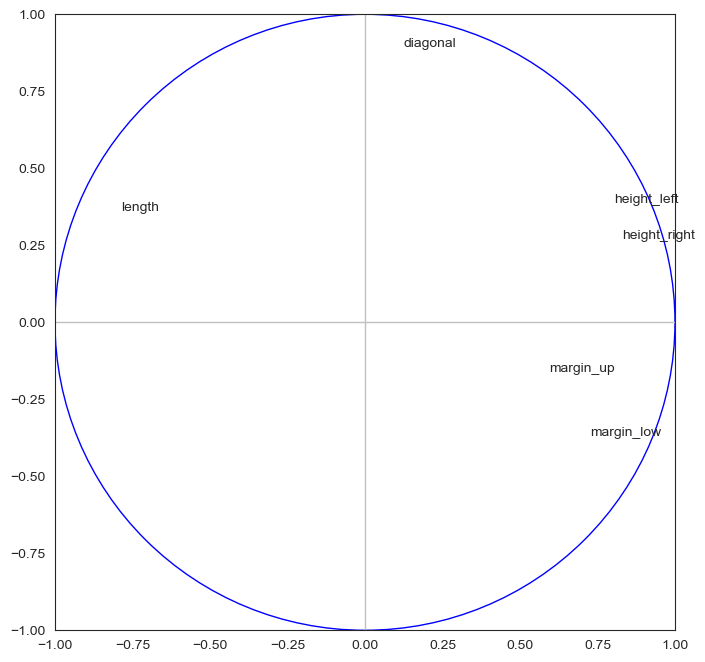

In [73]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(D.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.savefig('Cercle des corrélations')
#affichage
plt.show()

#### Qualité de représentation des variables (COS²) :

In [74]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':D.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

             id    COS2_1    COS2_2
0      diagonal  0.015286  0.800781
1   height_left  0.643685  0.151624
2  height_right  0.688626  0.073091
3    margin_low  0.528904  0.135358
4     margin_up  0.353822  0.026236
5        length  0.616553  0.130337


In [75]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

             id     CTR_1     CTR_2
0      diagonal  0.005369  0.607837
1   height_left  0.226102  0.115091
2  height_right  0.241888  0.055480
3    margin_low  0.185784  0.102744
4     margin_up  0.124284  0.019915
5        length  0.216572  0.098933


Les variables hauteur (à gauche et à droite) et longueur sont les variables qui contribuent majoritairement à F1
(68%).
La variable diagonale, contribue à 60% à F2.

### Mission 2 : Algorithme de K-Means

On définit un nombre de clusters dont la valeur est 2, car il y a deux types de billets : vrais et faux:

In [76]:
n_clust = 2

In [77]:
from sklearn.cluster import KMeans

In [78]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(D)

KMeans(n_clusters=2)

In [79]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [80]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18265/4148200035.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(D_projected[:, 0], D_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)


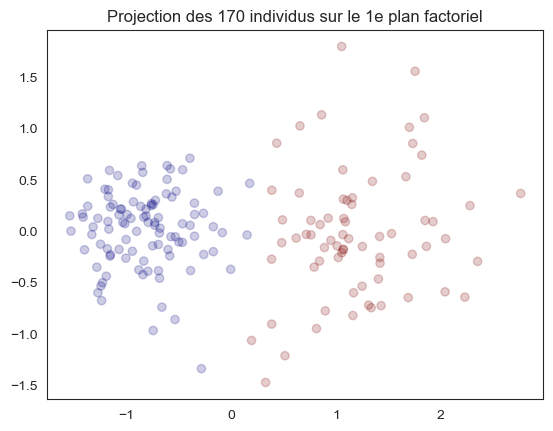

<Figure size 640x480 with 0 Axes>

In [81]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(D)
D_projected = pca.transform(D)
plt.scatter(D_projected[:, 0], D_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(D_projected.shape[0]))
plt.show(block=False)

plt.savefig('Projection des individus, 1er plan factoriel')

# next step : points pour les billets true et autre forme pour les ACP

In [82]:
clusters

# 0 == vrais billets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [83]:
matrice_confusion2 = pd.crosstab(clusters,notes['is_genuine'])
matrice_confusion2

is_genuine,False,True
row_0,,
0,2,99
1,68,1


3 billets ont été classés dans la mauvaise catégorie.

In [84]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Comparaison méthode kmeans et clustering obtenu via le dendrogramme 

In [85]:
matrice_confusion = pd.crosstab(clustering['cluster'], notes['is_genuine'])
matrice_confusion

#Cluster 1 : faux billets
#Cluster 2 : vrais billets

is_genuine,False,True
cluster,,
1,69,2
2,1,98


1 vrai billet a été identifié comme faux, 2 faux billets ont été identifiés comme vrais.
3 billets ont donc été mal classés, autant que dans le cadre de la méthode kmeans. Hormis que la nature des billets varient.

Il est plus coûteux pour l'entreprise de considérer un billet faux comme vrai, qu'un billet vrai comme étant faux.

## Régréssion logisitique

Effectuons donc une régression logistique de la nature du billet en fonction des caractéristiques géométriques.

Nous cherchons à mesurer les coefficients associés à chaque variable explicative, à prédire la nature du billet en fonction de ses caractéristiques géométriques et à valider les performances de notre modèle

### Modèle de régression logistique 

Nous procédons à l'importation des données ainsi que de la classe de calcul.

In [86]:
# importation des données
data = notes

In [87]:
#importation de la classe de calcul
import statsmodels.api as sm

In [88]:
import statsmodels.formula.api as smf

In [89]:
reg_log = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up',data=notes, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      164
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -5.5991
Date:                                       Sun, 30 Jul 2023   Deviance:                       11.198
Time:                                               22:34:40   Pearson chi2:                     10.1
No. Iterations:                                           11   Pseudo R-squ. (CS):             0.7245
Covariance Type:                                   nonrobust                      

Certaines des variables obtenues ont des p-valeurs qui sont inférieures au niveau de test de 5 %, ce qui nous indique qu'elles sont bien significatives. 
C'est le cas de **margin_low** et **margin_up**.
Certaines autres ne sont pas en dessous de ce seuil. 
On peut donc passer sur une procédure de sélection en retirant les variables non significatives

### Suppression des valeurs non significatives

In [90]:
reg_log2 = smf.glm('is_genuine~+margin_low+margin_up',data=notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      167
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -6.3603
Date:                                       Sun, 30 Jul 2023   Deviance:                       12.721
Time:                                               22:34:40   Pearson chi2:                     11.3
No. Iterations:                                           11   Pseudo R-squ. (CS):             0.7220
Covariance Type:                                   nonrobust                      

calculer l'écart entre Deviance quand null et avec la variable.

In [91]:
print(reg_log2.summary2())

                           Results: Generalized linear model
Model:              GLM                                       AIC:            18.7206  
Link Function:      Logit                                     BIC:            -844.9577
Dependent Variable: ['is_genuine[False]', 'is_genuine[True]'] Log-Likelihood: -6.3603  
Date:               2023-07-30 22:34                          LL-Null:        -115.17  
No. Observations:   170                                       Deviance:       12.721   
Df Model:           2                                         Pearson chi2:   11.3     
Df Residuals:       167                                       Scale:          1.0000   
Method:             IRLS                                                               
-------------------------------------------------------------------------------------------
                     Coef.       Std.Err.        z        P>|z|        [0.025       0.975] 
---------------------------------------------------

**Rapport de vraisemblance :**

In [92]:
reg_log2.null_deviance-reg_log2.deviance

217.62748135871303

On obtient les paramètres estimés : 𝛽̂1=-176 et 𝛽̂2=16.53 et 𝛽̂3 = 31.67. Enregistrons-les :

In [93]:
beta1 = reg_log2.params[0] #constante 
beta2 = reg_log2.params[1]
beta3 = reg_log2.params[2]
print(beta1,beta2,beta3)

-176.46376541398837 16.535556735610612 31.67214919028343


On calcule les ordonnées de la courbe, grâce à l'expression :


𝑓(𝑥)=𝑒𝛽1+𝛽2𝑥/1+𝑒𝛽1+𝛽2𝑥

In [94]:
x1 = data.iloc[:,[4]].values
x1

array([[4.52],
       [4.01],
       [4.4 ],
       [3.73],
       [5.04],
       [4.54],
       [3.97],
       [3.54],
       [4.06],
       [4.63],
       [3.89],
       [3.86],
       [4.  ],
       [3.81],
       [3.81],
       [4.56],
       [4.07],
       [4.52],
       [3.6 ],
       [4.19],
       [4.29],
       [4.08],
       [4.18],
       [4.47],
       [3.65],
       [4.06],
       [4.45],
       [4.92],
       [3.64],
       [4.08],
       [3.9 ],
       [4.36],
       [3.9 ],
       [4.28],
       [4.34],
       [4.75],
       [4.08],
       [3.8 ],
       [4.23],
       [4.16],
       [4.49],
       [4.29],
       [4.66],
       [4.45],
       [4.05],
       [4.09],
       [4.13],
       [3.66],
       [3.97],
       [4.01],
       [3.8 ],
       [4.59],
       [3.93],
       [3.78],
       [3.95],
       [4.56],
       [4.5 ],
       [4.39],
       [3.97],
       [4.05],
       [4.19],
       [3.69],
       [3.98],
       [4.03],
       [4.22],
       [4.51],
       [3.

In [95]:
x2 = data.iloc[:,[5]].values
x2

array([[2.89],
       [2.87],
       [2.88],
       [3.12],
       [2.27],
       [2.99],
       [2.9 ],
       [3.19],
       [3.33],
       [3.02],
       [3.53],
       [3.2 ],
       [3.26],
       [3.25],
       [3.24],
       [2.56],
       [2.92],
       [2.71],
       [3.5 ],
       [3.03],
       [3.01],
       [3.07],
       [3.22],
       [2.95],
       [3.24],
       [3.3 ],
       [2.94],
       [2.89],
       [3.16],
       [2.7 ],
       [3.22],
       [2.77],
       [3.18],
       [3.07],
       [3.14],
       [2.94],
       [2.93],
       [2.99],
       [2.79],
       [2.92],
       [2.8 ],
       [2.95],
       [2.75],
       [2.95],
       [3.08],
       [3.12],
       [3.07],
       [3.28],
       [3.12],
       [2.94],
       [3.02],
       [2.91],
       [3.24],
       [3.25],
       [3.  ],
       [2.83],
       [3.1 ],
       [2.7 ],
       [3.32],
       [3.12],
       [2.98],
       [3.17],
       [3.18],
       [3.25],
       [3.17],
       [3.19],
       [3.

In [96]:
y = np.exp(beta1+beta2*x1+beta3*x2)/(1+np.exp(beta1+beta2*x1+beta3*x2))  # correspond au predict, le fittedvalues correspond au xBeta sans la constante

In [97]:
y

array([[3.75222926e-05],
       [4.33252756e-09],
       [3.75835248e-06],
       [1.16074521e-07],
       [6.03194869e-10],
       [1.23850406e-03],
       [5.78283074e-09],
       [4.60407622e-08],
       [2.06101064e-02],
       [1.40048578e-02],
       [4.16352956e-01],
       [1.25517362e-05],
       [8.49228981e-04],
       [2.67537439e-05],
       [1.94911437e-05],
       [2.10084798e-09],
       [5.69339552e-08],
       [1.25429149e-07],
       [2.27558713e-03],
       [1.34950968e-05],
       [3.74278535e-05],
       [7.77028520e-06],
       [4.67510371e-03],
       [1.09772944e-04],
       [1.38304726e-06],
       [8.07149159e-03],
       [5.74568240e-05],
       [2.72171097e-02],
       [9.30296527e-08],
       [6.32522055e-11],
       [4.58186396e-05],
       [5.95240830e-08],
       [1.29078794e-05],
       [2.12133084e-04],
       [5.22583720e-03],
       [8.13224874e-03],
       [9.22008122e-08],
       [6.01551576e-09],
       [1.30684593e-08],
       [2.52167066e-07],


Les résidus sont obtenus par la commande resid_response.

In [98]:
reg_log2.resid_response

0     -3.752229e-05
1     -4.332528e-09
2     -3.758352e-06
3     -1.160745e-07
4     -6.031949e-10
           ...     
165    5.810064e-11
166    3.001756e-02
167    6.140191e-05
168    6.907083e-07
169    2.317851e-09
Length: 170, dtype: float64

Nous créons un dataframe contenant les informations à disposition.

In [99]:
reg_billets = notes[["is_genuine", 'margin_low', 'margin_up']].copy()

In [100]:
var = data[['margin_low', 'margin_up']]
var

,margin_low,margin_up
0,4.52,2.89
1,4.01,2.87
2,4.40,2.88
3,3.73,3.12
4,5.04,2.27
...,...,...
165,5.24,3.58
166,5.04,3.05
167,4.88,3.33
168,4.73,3.55


In [101]:
variables = data[['margin_low', 'margin_up']].values

In [102]:
reg_log2.predict()

array([3.75222926e-05, 4.33252756e-09, 3.75835248e-06, 1.16074521e-07,
       6.03194869e-10, 1.23850406e-03, 5.78283074e-09, 4.60407622e-08,
       2.06101064e-02, 1.40048578e-02, 4.16352956e-01, 1.25517362e-05,
       8.49228981e-04, 2.67537439e-05, 1.94911437e-05, 2.10084798e-09,
       5.69339552e-08, 1.25429149e-07, 2.27558713e-03, 1.34950968e-05,
       3.74278535e-05, 7.77028520e-06, 4.67510371e-03, 1.09772944e-04,
       1.38304726e-06, 8.07149159e-03, 5.74568240e-05, 2.72171097e-02,
       9.30296527e-08, 6.32522055e-11, 4.58186396e-05, 5.95240830e-08,
       1.29078794e-05, 2.12133084e-04, 5.22583720e-03, 8.13224874e-03,
       9.22008122e-08, 6.01551576e-09, 1.30684593e-08, 2.52167066e-07,
       1.32102942e-06, 5.59636934e-06, 4.50796259e-06, 7.88647106e-05,
       6.49454721e-06, 4.46669118e-05, 1.77622375e-05, 5.79228204e-06,
       6.14110514e-06, 3.97735259e-08, 1.55569356e-08, 2.24905378e-04,
       1.41755639e-04, 1.62910875e-05, 9.86321231e-08, 1.08705272e-05,
      

In [103]:
reg_billets['margin_low'] = x1
reg_billets['margin_up'] = x2
reg_billets['val_estime_y'] = y
reg_billets['residual'] = reg_log2.resid_response
reg_billets['prediction'] = reg_log2.predict() # correspond au y
reg_billets

,is_genuine,margin_low,margin_up,val_estime_y,residual,prediction
0,True,4.52,2.89,3.752229e-05,-3.752229e-05,3.752229e-05
1,True,4.01,2.87,4.332528e-09,-4.332528e-09,4.332528e-09
2,True,4.40,2.88,3.758352e-06,-3.758352e-06,3.758352e-06
3,True,3.73,3.12,1.160745e-07,-1.160745e-07,1.160745e-07
4,True,5.04,2.27,6.031949e-10,-6.031949e-10,6.031949e-10
...,...,...,...,...,...,...
165,False,5.24,3.58,1.000000e+00,5.810064e-11,1.000000e+00
166,False,5.04,3.05,9.699824e-01,3.001756e-02,9.699824e-01
167,False,4.88,3.33,9.999386e-01,6.140191e-05,9.999386e-01
168,False,4.73,3.55,9.999993e-01,6.907083e-07,9.999993e-01


Les valeurs prédites par le modèle sont :

In [104]:
reg_log2.fittedvalues

0      3.752229e-05
1      4.332528e-09
2      3.758352e-06
3      1.160745e-07
4      6.031949e-10
           ...     
165    1.000000e+00
166    9.699824e-01
167    9.999386e-01
168    9.999993e-01
169    1.000000e+00
Length: 170, dtype: float64

### Test d'hypothèse
Nous validerons notre modèle en faisant une analyse résiduelle. 
Les tests ou hypothèses que nous ferons pour vérifier la validité de notre modèle:
- Normalité
- Multicollinéarité
- Autocorrélation
- Homoscédasticité

En effet, le test d’évaluation de la significativité du lien linéaire entre les deux variables est valide, si les résidus :

- sont distribués selon une loi Normale de moyenne 0
- sont indépendants
- sont distribués de façon homogènes, c’est à dire, avec une variance constante

In [105]:
residus = reg_log2.resid_response

### Normalité 
Cela suppose que les termes d'erreur du modèle sont normalement distribués. 
Nous examinerons la normalité des résidus en la traçant dans l'histogramme 
Nous regarderons la valeur p du test d'Anderson-Darling pour la normalité. 
Nous utiliserons la normal_ad()fonction de statsmodel pour calculer notre p-value, puis la comparerons au seuil de 0,05, si la p-value que nous obtenons est supérieure au seuil, nous pouvons supposer que notre résidu est normalement distribué.

In [106]:
residus.describe()

count    1.700000e+02
mean     6.354394e-16
std      1.141273e-01
min     -7.501699e-01
25%     -2.216317e-05
50%     -9.380398e-08
75%      2.861779e-09
max      7.616997e-01
dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


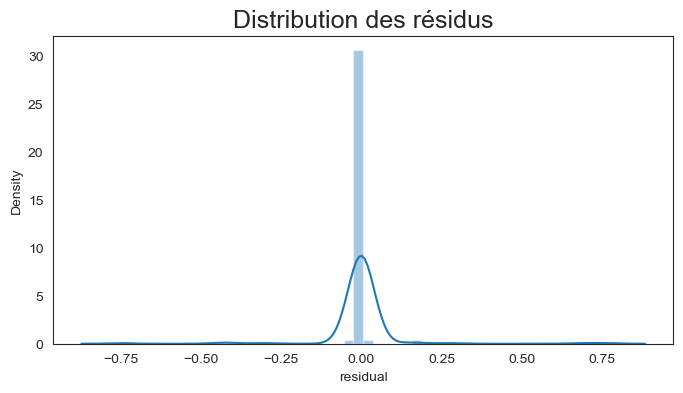

In [107]:
# Représentation graphique de la distribution des résidus
plt.subplots(figsize=(8, 4))
plt.title('Distribution des résidus', fontsize=18)
sns.distplot(reg_billets['residual'])

plt.savefig('Distribution des résidus')
plt.show()

In [108]:
from statsmodels.stats._adnorm import normal_ad, anderson_statistic

In [109]:
# Test d'Anderson 
p_value = normal_ad(reg_billets['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


In [110]:
from scipy import stats

In [111]:
# Test de Shapiro
stats.shapiro(residus)

ShapiroResult(statistic=0.2782723307609558, pvalue=1.9770757411772402e-25)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.


### Multicollinéarité
Il s'agit de vérifier si la variable est une combinaison linéaire d'une autre variable.
Ici, les variables explicatives sont au nombre de deux, une variable seule ne peut-être la combinaison linéaire de plusieurs variables.

In [112]:
corr = reg_billets[['is_genuine','margin_low','margin_up']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

Pearson correlation coefficient matrix of each variables:
             is_genuine  margin_low  margin_up
is_genuine    1.000000   -0.800111  -0.582801
margin_low   -0.800111    1.000000   0.171113
margin_up    -0.582801    0.171113   1.000000


### Autocorrélation
L'autocorrélation est la corrélation des erreurs (résidus) dans le temps. Utilisé lorsque les données sont collectées au fil du temps pour détecter si une autocorrélation est présente. L'autocorrélation existe si les résidus d'une période sont liés aux résidus d'une autre période. Nous pouvons détecter l'autocorrélation en effectuant un test de Durbin-Watson pour déterminer si une corrélation positive ou négative est présente. Dans cette étape, nous utiliserons la durbin_watson ()fonction de statsmodel pour calculer notre score Durbin-Watson, puis évaluerons la valeur avec la condition suivante:

- Si le score de Durbin-Watson est inférieur à 1,5, il y a une autocorrélation positive et l'hypothèse n'est pas satisfaite
- Si le score de Durbin-Watson est compris entre 1,5 et 2,5 alors il n'y a pas d'autocorrélation et l'hypothèse est satisfaite
- Si le score de Durbin-Watson est supérieur à 2,5, il y a une autocorrélation négative et l'hypothèse n'est pas satisfaite.

Cas ici : données en coupes transversale =/ séries temporelles.
Mais les résidus peuvent-être corrélés entre eux.

In [113]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(reg_billets['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9455971951423847
Little to no autocorrelation 

Assumption satisfied


### Homoscédasticité
Même variance dans nos termes d'erreur. 
L'hétéroscédasticité, la violation de l'homoscédasticité, se produit lorsque nous n'avons pas de variance uniforme entre les termes d'erreur. 
Pour détecter l'homoscédasticité, nous pouvons tracer notre résidu et voir si la variance semble uniforme.
Nous effectuons également un test de Breush Pagan.

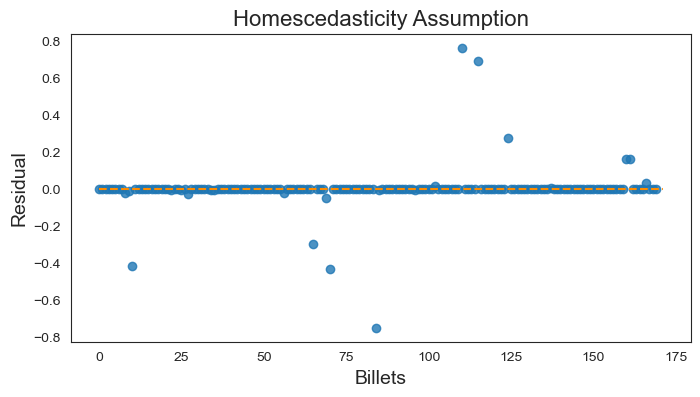

In [114]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=reg_billets.index, y=reg_billets.residual, alpha=0.8)
plt.plot(np.repeat(0, len(reg_billets.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Billets', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  


In [115]:
reg_billets['resid_pearson'] = reg_log2.resid_pearson
reg_billets

,is_genuine,margin_low,margin_up,val_estime_y,residual,prediction,resid_pearson
0,True,4.52,2.89,3.752229e-05,-3.752229e-05,3.752229e-05,-0.006126
1,True,4.01,2.87,4.332528e-09,-4.332528e-09,4.332528e-09,-0.000066
2,True,4.40,2.88,3.758352e-06,-3.758352e-06,3.758352e-06,-0.001939
3,True,3.73,3.12,1.160745e-07,-1.160745e-07,1.160745e-07,-0.000341
4,True,5.04,2.27,6.031949e-10,-6.031949e-10,6.031949e-10,-0.000025
...,...,...,...,...,...,...,...
165,False,5.24,3.58,1.000000e+00,5.810064e-11,1.000000e+00,0.000008
166,False,5.04,3.05,9.699824e-01,3.001756e-02,9.699824e-01,0.175916
167,False,4.88,3.33,9.999386e-01,6.140191e-05,9.999386e-01,0.007836
168,False,4.73,3.55,9.999993e-01,6.907083e-07,9.999993e-01,0.000831


#### Utilisation des résidus de pearson (résidus standardisés)

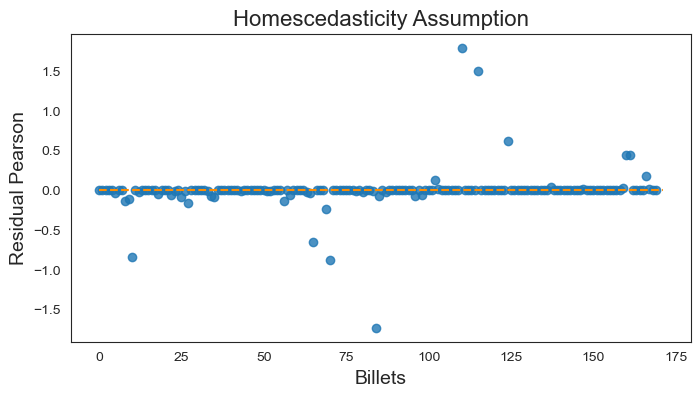

In [116]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=reg_billets.index, y=reg_billets.resid_pearson, alpha=0.8)
plt.plot(np.repeat(0, len(reg_billets.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual Pearson', fontsize=14)
plt.xlabel('Billets', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)

plt.savefig("Hypothèse d'homoscédasticité")
plt.show()  

# entre -2 et 2

In [117]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_log2.resid_response, var)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0015682565287808475


Il faudrait réestimer le modèle, en ayant au préalable identifier la cause de l'hétéroscédasticité. En pratique, il faudrait représenter les résidus en fonction d'une variable.
(cf : Ricco Rakotomalala)

La p-valeur ici est inférieure à  5 %, on rejette l'hypothèse  𝐻0  selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### Individus influents 
En sus, nous identifions les **individus aytpiques/influents** à travers une analyse des résidus.

Au préalable, il faudrait les studentiser.


In [118]:
residuals = pd.DataFrame(reg_log2.resid_response)

In [119]:
residuals = residuals.rename(columns={0 : "Residus"})
residuals

,Residus
0,-3.752229e-05
1,-4.332528e-09
2,-3.758352e-06
3,-1.160745e-07
4,-6.031949e-10
...,...
165,5.810064e-11
166,3.001756e-02
167,6.140191e-05
168,6.907083e-07


In [120]:
residuals.describe()

,Residus
count,1.700000e+02
mean,6.354394e-16
std,1.141273e-01
min,-7.501699e-01
25%,-2.216317e-05
50%,-9.380398e-08
75%,2.861779e-09
max,7.616997e-01


In [121]:
resid = reg_log2.resid_deviance
resid

0     -0.008663
1     -0.000093
2     -0.002742
3     -0.000482
4     -0.000035
         ...   
165    0.000011
166    0.246890
167    0.011082
168    0.001175
169    0.000068
Length: 170, dtype: float64

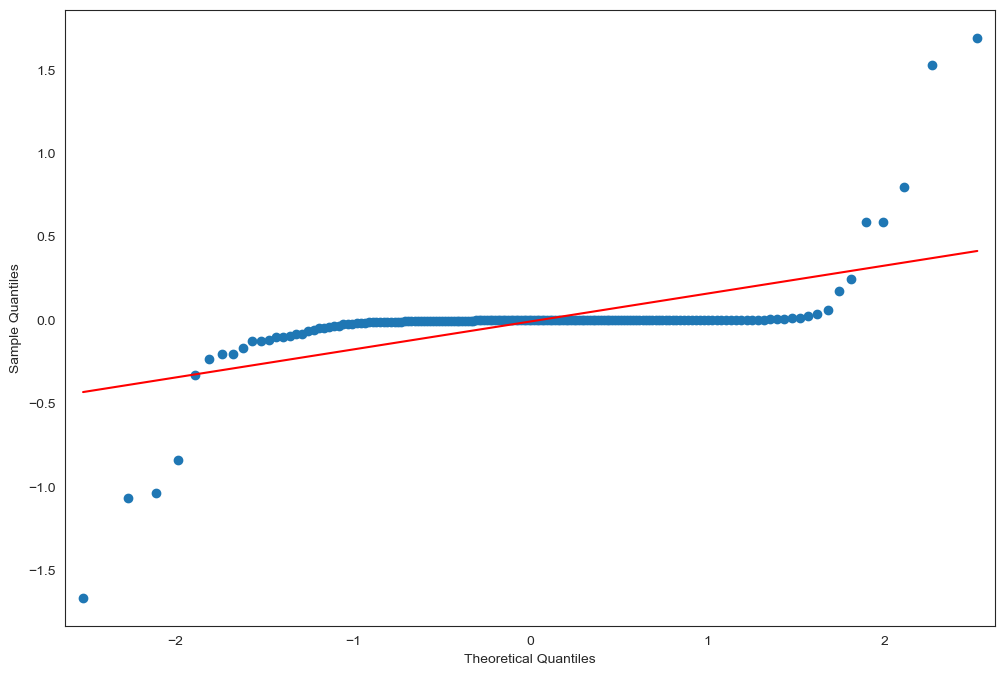

In [122]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.qqplot(resid, line="r", ax=ax)

plt.savefig('Déviance des résidus')

In [123]:
outliers = reg_log2.get_influence(observed=True)
outliers

In [124]:
reg_log2.predict()

array([3.75222926e-05, 4.33252756e-09, 3.75835248e-06, 1.16074521e-07,
       6.03194869e-10, 1.23850406e-03, 5.78283074e-09, 4.60407622e-08,
       2.06101064e-02, 1.40048578e-02, 4.16352956e-01, 1.25517362e-05,
       8.49228981e-04, 2.67537439e-05, 1.94911437e-05, 2.10084798e-09,
       5.69339552e-08, 1.25429149e-07, 2.27558713e-03, 1.34950968e-05,
       3.74278535e-05, 7.77028520e-06, 4.67510371e-03, 1.09772944e-04,
       1.38304726e-06, 8.07149159e-03, 5.74568240e-05, 2.72171097e-02,
       9.30296527e-08, 6.32522055e-11, 4.58186396e-05, 5.95240830e-08,
       1.29078794e-05, 2.12133084e-04, 5.22583720e-03, 8.13224874e-03,
       9.22008122e-08, 6.01551576e-09, 1.30684593e-08, 2.52167066e-07,
       1.32102942e-06, 5.59636934e-06, 4.50796259e-06, 7.88647106e-05,
       6.49454721e-06, 4.46669118e-05, 1.77622375e-05, 5.79228204e-06,
       6.14110514e-06, 3.97735259e-08, 1.55569356e-08, 2.24905378e-04,
       1.41755639e-04, 1.62910875e-05, 9.86321231e-08, 1.08705272e-05,
      

### Prédiction des résultats

In [125]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0
resultat = np.where(reg_log2.predict() > 0.5, 0, 1)
print(resultat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [126]:
variable_endog = notes.iloc[:,0]
variable_endog

0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: is_genuine, Length: 170, dtype: bool

In [127]:
#on peut en déduire la matrice de confusion
print(pd.crosstab(resultat,variable_endog))

is_genuine  False  True
row_0                  
0              68     1
1               2    99
